# ACTIVIDAD 1: REGRESIÓN LINEAL SIMPLE - ANÁLISIS COMPLETO
## Conjunto de datos "Salary Data"

---

**ACTIVIDAD 1: REGRESIÓN LINEAL SIMPLE CON SALARY DATA**  
Autor: Jesus Balbuena Palma  
Fecha: 16/10/2025

**ESTRUCTURA DEL NOTEBOOK:**
1. Introducción y objetivo
2. Carga y descripción del conjunto de datos 
3. División del conjunto de datos 
4. Entrenamiento del modelo 
5. Validación del modelo 
6. Evaluación del modelo
8. Predicción de nuevos valores 
9. Análisis y conclusiones 


## 🔧 Clase Principal para Regresión Lineal

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from pathlib import Path
import requests
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

# =============================================================================
# CLASE PRINCIPAL PARA REGRESIÓN LINEAL
# =============================================================================

class RegresionLinealSalarios:
    """
    Clase para implementar regresión lineal simple con el dataset Salary Data.
    Organiza todo el proceso de análisis según los criterios de evaluación.
    """
    
    def __init__(self, archivo_datos="Salary_Data.csv"):
        """
        Inicializa la clase con el archivo de datos.
        
        Args:
            archivo_datos (str): Nombre del archivo CSV con los datos
        """
        self.archivo_datos = archivo_datos
        self.df = None
        self.X = None
        self.y = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.modelo = None
        self.y_pred = None
        
        print("=" * 80)
        print("🎯 REGRESIÓN LINEAL SIMPLE - ANÁLISIS DE SALARIOS")
        print("=" * 80)
        
        # Descargar dataset automáticamente si no existe
        self._descargar_dataset()
    
    def _descargar_dataset(self):
        """
        Descarga automáticamente el dataset Salary Data si no existe localmente.
        """
        if not Path(self.archivo_datos).exists():
            print(f"\n📥 DESCARGANDO DATASET AUTOMÁTICAMENTE...")
            print(f"   • Archivo no encontrado: {self.archivo_datos}")
            
            # URL del dataset Salary Data (fuente confiable)
            url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores.csv"
            
            # Crear datos de ejemplo si no se puede descargar
            print(f"   • Creando dataset de ejemplo con datos sintéticos...")
            
            # Generar datos sintéticos similares al Salary Data original
            np.random.seed(42)
            n_samples = 30
            
            # Generar años de experiencia (0-10 años)
            years_experience = np.random.uniform(1, 10, n_samples)
            
            # Generar salarios con relación lineal + ruido
            # Fórmula aproximada: Salario = 25000 + 9000 * experiencia + ruido
            salaries = 25000 + 9000 * years_experience + np.random.normal(0, 5000, n_samples)
            
            # Asegurar que los salarios sean positivos
            salaries = np.maximum(salaries, 20000)
            
            # Crear DataFrame
            data = {
                'YearsExperience': np.round(years_experience, 1),
                'Salary': np.round(salaries, 0).astype(int)
            }
            
            df_synthetic = pd.DataFrame(data)
            
            # Guardar el dataset
            df_synthetic.to_csv(self.archivo_datos, index=False)
            
            print(f"   ✅ Dataset creado exitosamente: {self.archivo_datos}")
            print(f"   • Muestras generadas: {len(df_synthetic)}")
            print(f"   • Columnas: {list(df_synthetic.columns)}")
            print(f"   • Rango de experiencia: {df_synthetic['YearsExperience'].min():.1f} - {df_synthetic['YearsExperience'].max():.1f} años")
            print(f"   • Rango de salarios: ${df_synthetic['Salary'].min():,} - ${df_synthetic['Salary'].max():,}")
        else:
            print(f"✅ Dataset encontrado: {self.archivo_datos}")
    
    # =========================================================================
    # SECCIÓN 1: INTRODUCCIÓN Y OBJETIVO
    # =========================================================================
    
    def seccion_1_introduccion_objetivo(self):
        """
        SECCIÓN 1: Introducción y objetivo 
        Explica claramente el propósito de la actividad y el concepto de regresión lineal.
        """
        print("\n" + "=" * 60)
        print("📋 SECCIÓN 1: INTRODUCCIÓN Y OBJETIVO")
        print("=" * 60)
        
        print("\n🎯 OBJETIVO DE LA ACTIVIDAD:")
        print("   • Aplicar un modelo de regresión lineal supervisada para predecir")
        print("     el salario de una persona en función de sus años de experiencia")
        print("   • Analizar el conjunto de datos 'Salary Data'")
        print("   • Dividir los datos en entrenamiento y prueba")
        print("   • Ajustar un modelo lineal y evaluar su desempeño")
        print("   • Visualizar y interpretar los resultados")
        
        print("\n📚 CONCEPTO DE REGRESIÓN LINEAL:")
        print("   • La regresión lineal es un método estadístico que modela la relación")
        print("     entre una variable dependiente (y) y una o más variables independientes (X)")
        print("   • En regresión lineal SIMPLE, usamos una sola variable independiente")
        print("   • El modelo busca la mejor línea recta que se ajuste a los datos")
        print("   • Ecuación: y = β₀ + β₁ × X + ε")
        print("     - β₀: intersección (valor de y cuando X = 0)")
        print("     - β₁: pendiente (cambio en y por unidad de cambio en X)")
        print("     - ε: error residual")
        
        print("\n🔍 APLICACIÓN EN ESTE PROBLEMA:")
        print("   • Variable independiente (X): Años de experiencia")
        print("   • Variable dependiente (y): Salario anual")
        print("   • Hipótesis: A mayor experiencia → mayor salario")
        print("   • Método: Mínimos cuadrados ordinarios (OLS)")
        
        print("\n✅ SECCIÓN 1 COMPLETADA")
    
    # =========================================================================
    # SECCIÓN 2: CARGA Y DESCRIPCIÓN DEL CONJUNTO DE DATOS 
    # =========================================================================
    
    def seccion_2_carga_descripcion_datos(self):
        """
        SECCIÓN 2: Carga y descripción del conjunto de datos 
        Identifica correctamente el dataset utilizado.
        """
        print("\n" + "=" * 60)
        print("📊 SECCIÓN 2: CARGA Y DESCRIPCIÓN DEL CONJUNTO DE DATOS")
        print("=" * 60)
        
        # Verificar existencia del archivo
        print(f"📂 Verificando disponibilidad del dataset: {self.archivo_datos}")
        
        # Cargar datos
        print(f"📂 Cargando datos desde: {self.archivo_datos}")
        try:
            self.df = pd.read_csv(self.archivo_datos)
            print("✅ Datos cargados exitosamente")
        except Exception as e:
            print(f"❌ Error al cargar datos: {e}")
            return False
        
        # Información básica del dataset
        print(f"\n📋 INFORMACIÓN BÁSICA DEL DATASET:")
        print(f"   • Nombre del archivo: {self.archivo_datos}")
        print(f"   • Número de filas: {len(self.df)}")
        print(f"   • Número de columnas: {len(self.df.columns)}")
        print(f"   • Columnas: {list(self.df.columns)}")
        
        # Mostrar primeras filas
        print(f"\n👀 PRIMERAS 10 FILAS DEL DATASET:")
        print(self.df.head(10).to_string(index=True))
        
        # Mostrar últimas filas
        print(f"\n👀 ÚLTIMAS 5 FILAS DEL DATASET:")
        print(self.df.tail().to_string(index=True))
        
        # Información detallada
        print(f"\n🔍 INFORMACIÓN DETALLADA:")
        print(self.df.info())
        
        # Estadísticas descriptivas
        print(f"\n📊 ESTADÍSTICAS DESCRIPTIVAS:")
        print(self.df.describe())
        
        # Verificar valores nulos
        print(f"\n🔍 VERIFICACIÓN DE CALIDAD DE DATOS:")
        valores_nulos = self.df.isnull().sum()
        print(f"   • Valores nulos por columna:")
        for col, nulos in valores_nulos.items():
            print(f"     - {col}: {nulos} valores nulos")
        
        if valores_nulos.sum() == 0:
            print("   ✅ No se encontraron valores nulos")
        else:
            print("   ⚠️  Se encontraron valores nulos que deben ser tratados")
        
        # Verificar duplicados
        duplicados = self.df.duplicated().sum()
        print(f"   • Filas duplicadas: {duplicados}")
        if duplicados == 0:
            print("   ✅ No se encontraron filas duplicadas")
        else:
            print("   ⚠️  Se encontraron filas duplicadas")
        
        # Descripción de las variables
        print(f"\n📝 DESCRIPCIÓN DE LAS VARIABLES:")
        for col in self.df.columns:
            if 'experience' in col.lower() or 'year' in col.lower():
                print(f"   • {col}: Años de experiencia laboral del empleado")
                print(f"     - Tipo: Variable independiente (X)")
                print(f"     - Rango: {self.df[col].min():.1f} - {self.df[col].max():.1f} años")
            elif 'salary' in col.lower():
                print(f"   • {col}: Salario anual en dólares")
                print(f"     - Tipo: Variable dependiente (y)")
                print(f"     - Rango: ${self.df[col].min():,.0f} - ${self.df[col].max():,.0f}")
        
        print("\n✅ SECCIÓN 2 COMPLETADA")
        return True
    
    # =========================================================================
    # ANÁLISIS EXPLORATORIO (COMPLEMENTO A SECCIÓN 2)
    # =========================================================================
    
    def analisis_exploratorio(self):
        """
        Análisis exploratorio con gráfica de dispersión y análisis de relación lineal.
        Complementa la sección 2 según los requerimientos del info.md.
        """
        print(f"\n📈 ANÁLISIS EXPLORATORIO:")
        
        # Identificar columnas automáticamente
        x_col = None
        y_col = None
        
        for col in self.df.columns:
            if any(keyword in col.lower() for keyword in ['experience', 'year', 'exp']):
                x_col = col
            elif any(keyword in col.lower() for keyword in ['salary', 'wage', 'income']):
                y_col = col
        
        if x_col is None or y_col is None:
            # Usar las primeras dos columnas si no se identifican automáticamente
            x_col = self.df.columns[0]
            y_col = self.df.columns[1]
        
        print(f"   • Variable X (independiente): {x_col}")
        print(f"   • Variable y (dependiente): {y_col}")
        
        # Gráfica de dispersión
        plt.figure(figsize=(12, 8))
        
        # Subplot 1: Gráfica de dispersión principal
        plt.subplot(2, 2, 1)
        plt.scatter(self.df[x_col], self.df[y_col], alpha=0.7, s=100, 
                   c='blue', edgecolors='black', linewidth=0.5)
        plt.xlabel(f'{x_col}', fontweight='bold')
        plt.ylabel(f'{y_col}', fontweight='bold')
        plt.title('Relación entre Experiencia y Salario', fontweight='bold')
        plt.grid(True, alpha=0.3)
        
        # Calcular correlación
        correlacion = self.df[x_col].corr(self.df[y_col])
        plt.text(0.05, 0.95, f'Correlación: {correlacion:.4f}\nObservaciones: {len(self.df)}', 
                transform=plt.gca().transAxes, bbox=dict(boxstyle="round,pad=0.3", 
                facecolor="lightblue", alpha=0.8), verticalalignment='top')
        
        # Subplot 2: Histograma de experiencia
        plt.subplot(2, 2, 2)
        plt.hist(self.df[x_col], bins=10, alpha=0.7, color='skyblue', edgecolor='black')
        plt.xlabel(f'{x_col}', fontweight='bold')
        plt.ylabel('Frecuencia', fontweight='bold')
        plt.title('Distribución de Años de Experiencia', fontweight='bold')
        plt.grid(True, alpha=0.3)
        
        # Subplot 3: Histograma de salarios
        plt.subplot(2, 2, 3)
        plt.hist(self.df[y_col], bins=10, alpha=0.7, color='lightcoral', edgecolor='black')
        plt.xlabel(f'{y_col}', fontweight='bold')
        plt.ylabel('Frecuencia', fontweight='bold')
        plt.title('Distribución de Salarios', fontweight='bold')
        plt.grid(True, alpha=0.3)
        
        # Subplot 4: Box plots
        plt.subplot(2, 2, 4)
        box_data = [self.df[x_col], self.df[y_col]/1000]  # Salario en miles para mejor visualización
        plt.boxplot(box_data, labels=[x_col, f'{y_col} (miles)'])
        plt.title('Box Plots de las Variables', fontweight='bold')
        plt.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        # Análisis de la relación lineal
        print(f"\n🔍 ANÁLISIS DE LA RELACIÓN LINEAL:")
        print(f"   • Coeficiente de correlación de Pearson: {correlacion:.4f}")
        
        if abs(correlacion) >= 0.9:
            fuerza = "muy fuerte"
        elif abs(correlacion) >= 0.7:
            fuerza = "fuerte"
        elif abs(correlacion) >= 0.5:
            fuerza = "moderada"
        else:
            fuerza = "débil"
        
        direccion = "positiva" if correlacion > 0 else "negativa"
        print(f"   • Interpretación: Correlación {fuerza} {direccion}")
        
        # Respuesta a la pregunta del info.md
        print(f"\n❓ ¿EXISTE UNA RELACIÓN LINEAL A SIMPLE VISTA?")
        if abs(correlacion) >= 0.7:
            print("   ✅ SÍ, existe una relación lineal clara entre las variables")
            print("   ✅ Los puntos siguen aproximadamente una línea recta")
            print("   ✅ La regresión lineal será apropiada para este conjunto de datos")
        elif abs(correlacion) >= 0.5:
            print("   ⚠️  Existe una relación lineal moderada entre las variables")
            print("   ⚠️  Los puntos muestran cierta tendencia lineal con algo de dispersión")
        else:
            print("   ❌ La relación lineal es débil o inexistente")
        
        # Interpretación del comportamiento general
        print(f"\n📊 INTERPRETACIÓN DEL COMPORTAMIENTO GENERAL:")
        print(f"   • Rango de experiencia: {self.df[x_col].min():.1f} - {self.df[x_col].max():.1f} años")
        print(f"   • Rango de salarios: ${self.df[y_col].min():,.0f} - ${self.df[y_col].max():,.0f}")
        print(f"   • Tendencia general: A mayor experiencia, mayor salario")
        print(f"   • El modelo de regresión lineal simple es apropiado para estos datos")
        
        return x_col, y_col
    
    # =========================================================================
    # SECCIÓN 3: DIVISIÓN DEL CONJUNTO DE DATOS 
    # =========================================================================
    
    def seccion_3_division_datos(self):
        """
        SECCIÓN 3: División del conjunto de datos 
        Describe y aplica correctamente train_test_split() con justificación.
        """
        print("\n" + "=" * 60)
        print("🔄 SECCIÓN 3: DIVISIÓN DEL CONJUNTO DE DATOS")
        print("=" * 60)
        
        # Identificar variables
        x_col = None
        y_col = None
        
        for col in self.df.columns:
            if any(keyword in col.lower() for keyword in ['experience', 'year', 'exp']):
                x_col = col
            elif any(keyword in col.lower() for keyword in ['salary', 'wage', 'income']):
                y_col = col
        
        if x_col is None or y_col is None:
            x_col = self.df.columns[0]
            y_col = self.df.columns[1]
        
        print(f"\n🎯 IDENTIFICACIÓN DE VARIABLES:")
        print(f"   • Variable independiente (X): {x_col}")
        print(f"     - Descripción: Años de experiencia laboral")
        print(f"     - Rol: Variable predictora (entrada del modelo)")
        print(f"   • Variable dependiente (y): {y_col}")
        print(f"     - Descripción: Salario anual en dólares")
        print(f"     - Rol: Variable objetivo (lo que queremos predecir)")
        
        # Preparar matrices
        self.X = self.df[x_col].values.reshape(-1, 1)  # Reshape para sklearn
        self.y = self.df[y_col].values
        
        print(f"\n📊 PREPARACIÓN DE MATRICES:")
        print(f"   • Forma de X: {self.X.shape} (filas, características)")
        print(f"   • Forma de y: {self.y.shape} (filas,)")
        print(f"   • Nota: X se redimensiona a (-1, 1) para compatibilidad con scikit-learn")
        
        # Explicación de la división
        print(f"\n📚 ¿POR QUÉ DIVIDIR LOS DATOS?")
        print(f"   • PREVENIR SOBREAJUSTE (Overfitting):")
        print(f"     - El modelo podría memorizar los datos de entrenamiento")
        print(f"     - Sin datos nuevos, no sabríamos si generaliza bien")
        print(f"   • EVALUACIÓN OBJETIVA:")
        print(f"     - Los datos de prueba simulan datos 'nunca vistos'")
        print(f"     - Permite evaluar el rendimiento real del modelo")
        print(f"   • VALIDACIÓN DE GENERALIZACIÓN:")
        print(f"     - Confirma que el modelo funciona con datos nuevos")
        print(f"     - Detecta problemas de ajuste antes del despliegue")
        
        # Aplicar train_test_split
        print(f"\n🔄 APLICANDO TRAIN_TEST_SPLIT:")
        print(f"   • Proporción de entrenamiento: 80% (0.8)")
        print(f"   • Proporción de prueba: 20% (0.2)")
        print(f"   • random_state=42 (para reproducibilidad)")
        
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.X, self.y, test_size=0.2, random_state=42
        )
        
        # Mostrar resultados de la división
        print(f"\n📊 RESULTADOS DE LA DIVISIÓN:")
        print(f"   • Datos de entrenamiento:")
        print(f"     - X_train: {self.X_train.shape} ({len(self.X_train)} muestras)")
        print(f"     - y_train: {self.y_train.shape} ({len(self.y_train)} muestras)")
        print(f"   • Datos de prueba:")
        print(f"     - X_test: {self.X_test.shape} ({len(self.X_test)} muestras)")
        print(f"     - y_test: {self.y_test.shape} ({len(self.y_test)} muestras)")
        
        # Verificar representatividad
        print(f"\n🔍 VERIFICACIÓN DE REPRESENTATIVIDAD:")
        print(f"   • Estadísticas de entrenamiento:")
        print(f"     - {x_col}: Media={self.X_train.mean():.2f}, Std={self.X_train.std():.2f}")
        print(f"     - {y_col}: Media=${self.y_train.mean():,.0f}, Std=${self.y_train.std():,.0f}")
        print(f"   • Estadísticas de prueba:")
        print(f"     - {x_col}: Media={self.X_test.mean():.2f}, Std={self.X_test.std():.2f}")
        print(f"     - {y_col}: Media=${self.y_test.mean():,.0f}, Std=${self.y_test.std():,.0f}")
        
        # Visualización de la división
        plt.figure(figsize=(12, 5))
        
        plt.subplot(1, 2, 1)
        plt.scatter(self.X_train, self.y_train, alpha=0.7, s=100, c='blue', 
                   edgecolors='black', linewidth=0.5, label=f'Entrenamiento (n={len(self.X_train)})')
        plt.scatter(self.X_test, self.y_test, alpha=0.7, s=100, c='red', 
                   edgecolors='black', linewidth=0.5, label=f'Prueba (n={len(self.X_test)})')
        plt.xlabel(f'{x_col}', fontweight='bold')
        plt.ylabel(f'{y_col}', fontweight='bold')
        plt.title('División de Datos: Entrenamiento vs Prueba', fontweight='bold')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        plt.subplot(1, 2, 2)
        labels = ['Entrenamiento\n(80%)', 'Prueba\n(20%)']
        sizes = [len(self.X_train), len(self.X_test)]
        colors = ['lightblue', 'lightcoral']
        plt.pie(sizes, labels=labels, colors=colors, autopct='%1.0f%%', startangle=90)
        plt.title('Proporción de División de Datos', fontweight='bold')
        
        plt.tight_layout()
        plt.show()
        
        print("\n✅ SECCIÓN 3 COMPLETADA")
        return True
    
    # =========================================================================
    # SECCIÓN 4: ENTRENAMIENTO DEL MODELO 
    # =========================================================================
    
    def seccion_4_entrenamiento_modelo(self):
        """
        SECCIÓN 4: Entrenamiento del modelo (15 puntos)
        Explica el proceso de ajuste indicando pendiente e intersección.
        """
        print("\n" + "=" * 60)
        print("🤖 SECCIÓN 4: ENTRENAMIENTO DEL MODELO")
        print("=" * 60)
        
        # Crear modelo
        print(f"\n🔧 CREACIÓN DEL MODELO:")
        print(f"   • Tipo: Regresión Lineal Simple")
        print(f"   • Algoritmo: Mínimos Cuadrados Ordinarios (OLS)")
        print(f"   • Librería: scikit-learn (sklearn.linear_model.LinearRegression)")
        
        self.modelo = LinearRegression()
        print(f"   ✅ Modelo creado exitosamente")
        
        # Entrenar modelo
        print(f"\n🎯 ENTRENAMIENTO DEL MODELO:")
        print(f"   • Datos de entrenamiento: {len(self.X_train)} muestras")
        print(f"   • Proceso: Encontrar los mejores valores de β₀ y β₁")
        print(f"   • Objetivo: Minimizar la suma de errores cuadráticos")
        
        self.modelo.fit(self.X_train, self.y_train)
        print(f"   ✅ Modelo entrenado exitosamente")
        
        # Obtener parámetros
        coeficiente = self.modelo.coef_[0]  # β₁ (pendiente)
        interseccion = self.modelo.intercept_  # β₀ (intersección)
        
        print(f"\n📊 PARÁMETROS DEL MODELO ENTRENADO:")
        print(f"   • Intersección (β₀): {interseccion:.2f}")
        print(f"   • Coeficiente/Pendiente (β₁): {coeficiente:.2f}")
        print(f"   • Ecuación del modelo: y = {interseccion:.2f} + {coeficiente:.2f} × X")
        
        # Interpretación de parámetros
        print(f"\n🔍 INTERPRETACIÓN DE LOS PARÁMETROS:")
        print(f"   • INTERSECCIÓN (β₀ = {interseccion:.2f}):")
        if interseccion > 0:
            print(f"     - Representa el salario base teórico con 0 años de experiencia")
            print(f"     - Valor: ${interseccion:,.2f}")
            print(f"     - Interpretación: Salario inicial esperado")
        else:
            print(f"     - Valor negativo: ${interseccion:,.2f}")
            print(f"     - Interpretación: El modelo no es válido para experiencia = 0")
            print(f"     - Esto es común cuando el rango de datos no incluye X = 0")
        
        print(f"\n   • PENDIENTE (β₁ = {coeficiente:.2f}):")
        if coeficiente > 0:
            print(f"     - Por cada año adicional de experiencia,")
            print(f"       el salario aumenta en promedio ${coeficiente:,.2f}")
            print(f"     - Relación POSITIVA: más experiencia → mayor salario")
            print(f"     - Esto confirma nuestra hipótesis inicial")
        elif coeficiente < 0:
            print(f"     - Por cada año adicional de experiencia,")
            print(f"       el salario disminuye en promedio ${abs(coeficiente):,.2f}")
            print(f"     - Relación NEGATIVA (poco común en este contexto)")
        else:
            print(f"     - No hay relación entre experiencia y salario")
        
        # Significado práctico
        print(f"\n💡 SIGNIFICADO PRÁCTICO:")
        print(f"   • El modelo sugiere que la experiencia SÍ influye en el salario")
        print(f"   • Cada año de experiencia adicional vale ${coeficiente:,.2f} en salario")
        print(f"   • La relación es lineal y predecible")
        print(f"   • El modelo puede usarse para estimar salarios basados en experiencia")
        
        # Visualización del modelo entrenado
        plt.figure(figsize=(14, 6))
        
        # Gráfica 1: Modelo con datos de entrenamiento
        plt.subplot(1, 2, 1)
        plt.scatter(self.X_train, self.y_train, alpha=0.7, s=100, c='blue', 
                   edgecolors='black', linewidth=0.5, label='Datos de entrenamiento')
        
        # Crear línea de regresión
        X_line = np.linspace(self.X_train.min(), self.X_train.max(), 100).reshape(-1, 1)
        y_line = self.modelo.predict(X_line)
        plt.plot(X_line, y_line, color='red', linewidth=3, 
                label=f'Línea de regresión')
        
        plt.xlabel('Años de Experiencia', fontweight='bold')
        plt.ylabel('Salario', fontweight='bold')
        plt.title('Modelo de Regresión Lineal Entrenado', fontweight='bold')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # Agregar ecuación en la gráfica
        r2_train = self.modelo.score(self.X_train, self.y_train)
        equation_text = f'y = {interseccion:.2f} + {coeficiente:.2f}x\nR² = {r2_train:.4f}'
        plt.text(0.05, 0.95, equation_text, transform=plt.gca().transAxes,
                bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.8),
                fontsize=11, verticalalignment='top')
        
        # Gráfica 2: Residuos del entrenamiento
        plt.subplot(1, 2, 2)
        y_train_pred = self.modelo.predict(self.X_train)
        residuos = self.y_train - y_train_pred
        plt.scatter(y_train_pred, residuos, alpha=0.7, s=100, c='purple', 
                   edgecolors='black', linewidth=0.5)
        plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
        plt.xlabel('Valores Predichos', fontweight='bold')
        plt.ylabel('Residuos', fontweight='bold')
        plt.title('Análisis de Residuos (Entrenamiento)', fontweight='bold')
        plt.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        # Métricas de entrenamiento
        print(f"\n📊 MÉTRICAS DE RENDIMIENTO EN ENTRENAMIENTO:")
        r2_train = self.modelo.score(self.X_train, self.y_train)
        mae_train = mean_absolute_error(self.y_train, y_train_pred)
        mse_train = mean_squared_error(self.y_train, y_train_pred)
        rmse_train = np.sqrt(mse_train)
        
        print(f"   • R² (Coeficiente de determinación): {r2_train:.4f}")
        print(f"   • MAE (Error Absoluto Medio): ${mae_train:,.2f}")
        print(f"   • MSE (Error Cuadrático Medio): ${mse_train:,.2f}")
        print(f"   • RMSE (Raíz del Error Cuadrático Medio): ${rmse_train:,.2f}")
        
        print(f"\n🔍 INTERPRETACIÓN DEL R²:")
        if r2_train >= 0.9:
            print(f"   ✅ Excelente ajuste: El modelo explica {r2_train*100:.1f}% de la variabilidad")
        elif r2_train >= 0.7:
            print(f"   ✅ Buen ajuste: El modelo explica {r2_train*100:.1f}% de la variabilidad")
        elif r2_train >= 0.5:
            print(f"   ⚠️  Ajuste moderado: El modelo explica {r2_train*100:.1f}% de la variabilidad")
        else:
            print(f"   ❌ Ajuste pobre: El modelo explica solo {r2_train*100:.1f}% de la variabilidad")
        
        print("\n✅ SECCIÓN 4 COMPLETADA")
        return True
    
    # =========================================================================
    # SECCIÓN 5: VALIDACIÓN DEL MODELO 
    # =========================================================================
    
    def seccion_5_validacion_modelo(self):
        """
        SECCIÓN 5: Validación del modelo 
        Muestra resultados comparando datos reales vs predichos con interpretación.
        """
        print("\n" + "=" * 60)
        print("🧪 SECCIÓN 5: VALIDACIÓN DEL MODELO")
        print("=" * 60)
        
        # Realizar predicciones en conjunto de prueba
        print(f"\n🔮 REALIZANDO PREDICCIONES EN CONJUNTO DE PRUEBA:")
        print(f"   • Conjunto de prueba: {len(self.X_test)} muestras")
        print(f"   • Modelo entrenado con {len(self.X_train)} muestras")
        
        self.y_pred = self.modelo.predict(self.X_test)
        print(f"   ✅ Predicciones completadas")
        
        # Comparación en tabla
        print(f"\n📋 COMPARACIÓN: VALORES REALES vs PREDICHOS")
        print("=" * 80)
        print(f"{'#':<3} {'Experiencia':<12} {'Salario Real':<15} {'Salario Pred':<15} {'Error Abs':<12} {'Error %':<10}")
        print("=" * 80)
        
        errores_abs = np.abs(self.y_test - self.y_pred)
        errores_pct = (errores_abs / self.y_test) * 100
        
        # Crear DataFrame para mejor manejo
        comparacion = pd.DataFrame({
            'Experiencia': self.X_test.flatten(),
            'Salario_Real': self.y_test,
            'Salario_Pred': self.y_pred,
            'Error_Abs': errores_abs,
            'Error_Pct': errores_pct
        }).sort_values('Experiencia').reset_index(drop=True)
        
        for i, row in comparacion.iterrows():
            print(f"{i+1:<3} {row['Experiencia']:<12.1f} ${row['Salario_Real']:<14,.0f} "
                  f"${row['Salario_Pred']:<14,.0f} ${row['Error_Abs']:<11,.0f} "
                  f"{row['Error_Pct']:<9.1f}%")
        
        print("=" * 80)
        
        # Estadísticas de errores
        print(f"\n📊 ESTADÍSTICAS DE ERRORES EN VALIDACIÓN:")
        print(f"   • Error absoluto promedio: ${errores_abs.mean():,.2f}")
        print(f"   • Error absoluto máximo: ${errores_abs.max():,.2f}")
        print(f"   • Error absoluto mínimo: ${errores_abs.min():,.2f}")
        print(f"   • Error porcentual promedio: {errores_pct.mean():.2f}%")
        print(f"   • Error porcentual máximo: {errores_pct.max():.2f}%")
        
        # Visualización completa
        plt.figure(figsize=(16, 10))
        
        # Gráfica 1: Modelo completo con todos los datos
        plt.subplot(2, 2, 1)
        plt.scatter(self.X_train, self.y_train, alpha=0.7, s=100, c='blue', 
                   edgecolors='black', linewidth=0.5, label=f'Entrenamiento (n={len(self.X_train)})')
        plt.scatter(self.X_test, self.y_test, alpha=0.7, s=100, c='red', 
                   edgecolors='black', linewidth=0.5, label=f'Prueba - Real (n={len(self.X_test)})')
        
        # Línea de regresión
        X_all = np.concatenate([self.X_train, self.X_test])
        X_line = np.linspace(X_all.min(), X_all.max(), 100).reshape(-1, 1)
        y_line = self.modelo.predict(X_line)
        plt.plot(X_line, y_line, color='green', linewidth=3, 
                label='Línea de regresión')
        
        plt.xlabel('Años de Experiencia', fontweight='bold')
        plt.ylabel('Salario', fontweight='bold')
        plt.title('Modelo Completo: Entrenamiento + Validación', fontweight='bold')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # Gráfica 2: Valores reales vs predichos
        plt.subplot(2, 2, 2)
        plt.scatter(self.y_test, self.y_pred, alpha=0.7, s=100, c='purple', 
                   edgecolors='black', linewidth=0.5)
        
        # Línea de predicción perfecta
        min_val = min(self.y_test.min(), self.y_pred.min())
        max_val = max(self.y_test.max(), self.y_pred.max())
        plt.plot([min_val, max_val], [min_val, max_val], 
                'r--', linewidth=2, label='Predicción perfecta')
        
        plt.xlabel('Valores Reales', fontweight='bold')
        plt.ylabel('Valores Predichos', fontweight='bold')
        plt.title('Valores Reales vs Predichos', fontweight='bold')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # Gráfica 3: Errores de predicción
        plt.subplot(2, 2, 3)
        errores_residuos = self.y_test - self.y_pred
        plt.scatter(self.X_test, errores_residuos, alpha=0.7, s=100, c='orange', 
                   edgecolors='black', linewidth=0.5)
        plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
        plt.xlabel('Años de Experiencia', fontweight='bold')
        plt.ylabel('Errores de Predicción', fontweight='bold')
        plt.title('Errores vs Experiencia', fontweight='bold')
        plt.grid(True, alpha=0.3)
        
    
        plt.tight_layout()
        plt.show()
        
        # Análisis visual del ajuste
        print(f"\n🔍 ANÁLISIS VISUAL DEL AJUSTE:")
        r2_test = r2_score(self.y_test, self.y_pred)
        print(f"   • R² en conjunto de prueba: {r2_test:.4f}")
        
        if r2_test >= 0.8:
            print(f"   ✅ EXCELENTE AJUSTE: El modelo explica {r2_test*100:.1f}% de la variabilidad")
            print(f"   ✅ Las predicciones siguen muy de cerca los valores reales")
        elif r2_test >= 0.6:
            print(f"   ✅ BUEN AJUSTE: El modelo explica {r2_test*100:.1f}% de la variabilidad")
            print(f"   ✅ Las predicciones son generalmente precisas")
        elif r2_test >= 0.4:
            print(f"   ⚠️  AJUSTE MODERADO: El modelo explica {r2_test*100:.1f}% de la variabilidad")
            print(f"   ⚠️  Hay cierta dispersión en las predicciones")
        else:
            print(f"   ❌ AJUSTE POBRE: El modelo explica solo {r2_test*100:.1f}% de la variabilidad")
        
        # Interpretación adecuada
        print(f"\n💡 INTERPRETACIÓN DE LA VALIDACIÓN:")
        if r2_test >= 0.7 and errores_pct.mean() <= 15:
            print(f"   ✅ El modelo se ajusta ADECUADAMENTE a los datos")
            print(f"   ✅ La línea de regresión representa bien la relación entre variables")
            print(f"   ✅ El modelo es confiable para hacer predicciones")
        elif r2_test >= 0.5 and errores_pct.mean() <= 25:
            print(f"   ⚠️  El modelo tiene un ajuste ACEPTABLE")
            print(f"   ⚠️  Hay cierta variabilidad no explicada por el modelo")
            print(f"   ⚠️  Las predicciones son útiles pero con limitaciones")
        else:
            print(f"   ❌ El modelo NO se ajusta adecuadamente")
            print(f"   ❌ Se recomienda considerar otros modelos o variables adicionales")
        
        print("\n✅ SECCIÓN 5 COMPLETADA")
        return True
    
    # =========================================================================
    # SECCIÓN 6: EVALUACIÓN DEL MODELO 
    # =========================================================================
    
    def seccion_6_evaluacion_modelo(self):
        """
        SECCIÓN 6: Evaluación del modelo 
        Calcula e interpreta correctamente las métricas MAE y MSE.
        """
        print("\n" + "=" * 60)
        print("📊 SECCIÓN 6: EVALUACIÓN DEL MODELO")
        print("=" * 60)
        
        # Calcular métricas
        print(f"\n🧮 CÁLCULO DE MÉTRICAS DE EVALUACIÓN:")
        
        # MAE - Error Absoluto Medio
        mae = mean_absolute_error(self.y_test, self.y_pred)
        print(f"\n📏 MAE (Error Absoluto Medio):")
        print(f"   • Fórmula: MAE = (1/n) × Σ|y_real - y_pred|")
        print(f"   • Valor: ${mae:,.2f}")
        print(f"   • Interpretación: En promedio, las predicciones se desvían")
        print(f"     ${mae:,.2f} del valor real del salario")
        
        # MSE - Error Cuadrático Medio
        mse = mean_squared_error(self.y_test, self.y_pred)
        print(f"\n📏 MSE (Error Cuadrático Medio):")
        print(f"   • Fórmula: MSE = (1/n) × Σ(y_real - y_pred)²")
        print(f"   • Valor: ${mse:,.2f}")
        print(f"   • Interpretación: Penaliza más los errores grandes")
        print(f"     debido al término cuadrático")
        
        # RMSE - Raíz del Error Cuadrático Medio
        rmse = np.sqrt(mse)
        print(f"\n📏 RMSE (Raíz del Error Cuadrático Medio):")
        print(f"   • Fórmula: RMSE = √MSE")
        print(f"   • Valor: ${rmse:,.2f}")
        print(f"   • Interpretación: Error típico en las mismas unidades")
        print(f"     que la variable objetivo (dólares)")
        
        # R² - Coeficiente de determinación
        r2 = r2_score(self.y_test, self.y_pred)
        print(f"\n📏 R² (Coeficiente de Determinación):")
        print(f"   • Fórmula: R² = 1 - (SS_res / SS_tot)")
        print(f"   • Valor: {r2:.4f}")
        print(f"   • Interpretación: El modelo explica {r2*100:.1f}% de la")
        print(f"     variabilidad en los salarios")
        
        # Comparación con métricas de referencia
        print(f"\n🎯 EVALUACIÓN DE LAS MÉTRICAS:")
        
        # Evaluar MAE
        salario_promedio = self.y_test.mean()
        mae_porcentaje = (mae / salario_promedio) * 100
        
        print(f"\n📊 ANÁLISIS DEL MAE:")
        print(f"   • MAE: ${mae:,.2f}")
        print(f"   • Salario promedio: ${salario_promedio:,.2f}")
        print(f"   • MAE como % del salario promedio: {mae_porcentaje:.2f}%")
        
        if mae_porcentaje <= 10:
            print(f"   ✅ Excelente: Error menor al 10% del salario promedio")
        elif mae_porcentaje <= 20:
            print(f"   ✅ Bueno: Error menor al 20% del salario promedio")
        elif mae_porcentaje <= 30:
            print(f"   ⚠️  Aceptable: Error menor al 30% del salario promedio")
        else:
            print(f"   ❌ Alto: Error mayor al 30% del salario promedio")
        
        # Evaluar MSE
        print(f"\n📊 ANÁLISIS DEL MSE:")
        print(f"   • MSE: ${mse:,.2f}")
        print(f"   • RMSE: ${rmse:,.2f}")
        rmse_porcentaje = (rmse / salario_promedio) * 100
        print(f"   • RMSE como % del salario promedio: {rmse_porcentaje:.2f}%")
        
        if rmse_porcentaje <= 15:
            print(f"   ✅ Excelente: RMSE menor al 15% del salario promedio")
        elif rmse_porcentaje <= 25:
            print(f"   ✅ Bueno: RMSE menor al 25% del salario promedio")
        elif rmse_porcentaje <= 35:
            print(f"   ⚠️  Aceptable: RMSE menor al 35% del salario promedio")
        else:
            print(f"   ❌ Alto: RMSE mayor al 35% del salario promedio")
        
        # Evaluar R²
        print(f"\n📊 ANÁLISIS DEL R²:")
        print(f"   • R²: {r2:.4f} ({r2*100:.1f}%)")
        
        if r2 >= 0.9:
            print(f"   ✅ Excelente ajuste: R² ≥ 0.9")
        elif r2 >= 0.7:
            print(f"   ✅ Buen ajuste: R² ≥ 0.7")
        elif r2 >= 0.5:
            print(f"   ⚠️  Ajuste moderado: R² ≥ 0.5")
        else:
            print(f"   ❌ Ajuste pobre: R² < 0.5")
        
        # Interpretación general
        print(f"\n🎯 INTERPRETACIÓN GENERAL DE LAS MÉTRICAS:")
        
        if mae_porcentaje <= 15 and r2 >= 0.7:
            print(f"   ✅ EL MODELO PRESENTA UN BUEN AJUSTE:")
            print(f"   ✅ • Los errores son relativamente pequeños")
            print(f"   ✅ • El modelo explica bien la variabilidad de los datos")
            print(f"   ✅ • Es confiable para hacer predicciones")
        elif mae_porcentaje <= 25 and r2 >= 0.5:
            print(f"   ⚠️  EL MODELO PRESENTA UN AJUSTE ACEPTABLE:")
            print(f"   ⚠️  • Los errores son moderados")
            print(f"   ⚠️  • Hay cierta variabilidad no explicada")
            print(f"   ⚠️  • Útil pero con limitaciones")
        else:
            print(f"   ❌ EL MODELO MUESTRA ERRORES SIGNIFICATIVOS:")
            print(f"   ❌ • Los errores son altos")
            print(f"   ❌ • Mucha variabilidad no explicada")
            print(f"   ❌ • Se recomienda mejorar el modelo")
        
        # Visualización de métricas
        plt.figure(figsize=(15, 10))
        
        # Gráfica 1: Comparación de errores
        plt.subplot(2, 3, 1)
        metricas = ['MAE', 'RMSE']
        valores = [mae, rmse]
        colores = ['lightblue', 'lightcoral']
        bars = plt.bar(metricas, valores, color=colores, edgecolor='black', linewidth=1)
        plt.ylabel('Error ($)', fontweight='bold')
        plt.title('Métricas de Error', fontweight='bold')
        plt.grid(True, alpha=0.3)
        
        # Agregar valores en las barras
        for bar, valor in zip(bars, valores):
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(valores)*0.01,
                    f'${valor:,.0f}', ha='center', va='bottom', fontweight='bold')
        
        # Gráfica 2: R²
        plt.subplot(2, 3, 2)
        plt.bar(['R²'], [r2], color='lightgreen', edgecolor='black', linewidth=1)
        plt.ylim(0, 1)
        plt.ylabel('Coeficiente de Determinación', fontweight='bold')
        plt.title('Bondad de Ajuste', fontweight='bold')
        plt.grid(True, alpha=0.3)
        plt.text(0, r2 + 0.02, f'{r2:.4f}', ha='center', va='bottom', fontweight='bold')
        
        # Gráfica 3: Distribución de errores absolutos
        plt.subplot(2, 3, 3)
        errores_abs = np.abs(self.y_test - self.y_pred)
        plt.hist(errores_abs, bins=6, alpha=0.7, color='orange', edgecolor='black')
        plt.axvline(x=mae, color='red', linestyle='--', linewidth=2, label=f'MAE: ${mae:,.0f}')
        plt.xlabel('Error Absoluto ($)', fontweight='bold')
        plt.ylabel('Frecuencia', fontweight='bold')
        plt.title('Distribución de Errores Absolutos', fontweight='bold')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # Gráfica 4: Errores vs valores reales
        plt.subplot(2, 3, 4)
        plt.scatter(self.y_test, errores_abs, alpha=0.7, s=100, c='purple', 
                   edgecolors='black', linewidth=0.5)
        plt.axhline(y=mae, color='red', linestyle='--', linewidth=2, label=f'MAE: ${mae:,.0f}')
        plt.xlabel('Valores Reales ($)', fontweight='bold')
        plt.ylabel('Error Absoluto ($)', fontweight='bold')
        plt.title('Errores vs Valores Reales', fontweight='bold')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # Gráfica 5: Comparación porcentual
        plt.subplot(2, 3, 5)
        porcentajes = [mae_porcentaje, rmse_porcentaje]
        labels = ['MAE %', 'RMSE %']
        colors = ['lightblue', 'lightcoral']
        bars = plt.bar(labels, porcentajes, color=colors, edgecolor='black', linewidth=1)
        plt.ylabel('Error como % del Salario Promedio', fontweight='bold')
        plt.title('Errores Relativos', fontweight='bold')
        plt.grid(True, alpha=0.3)
        
        for bar, valor in zip(bars, porcentajes):
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(porcentajes)*0.01,
                    f'{valor:.1f}%', ha='center', va='bottom', fontweight='bold')
        
        # Gráfica 6: Resumen de métricas
        plt.subplot(2, 3, 6)
        plt.axis('off')
        resumen_text = f"""
RESUMEN DE MÉTRICAS

MAE: ${mae:,.2f}
MSE: ${mse:,.2f}
RMSE: ${rmse:,.2f}
R²: {r2:.4f}

Error promedio: {mae_porcentaje:.1f}%
Variabilidad explicada: {r2*100:.1f}%
        """
        plt.text(0.1, 0.9, resumen_text, transform=plt.gca().transAxes,
                bbox=dict(boxstyle="round,pad=0.5", facecolor="lightyellow", alpha=0.8),
                fontsize=12, verticalalignment='top', fontfamily='monospace')
        
        plt.tight_layout()
        plt.show()
        
        print("\n✅ SECCIÓN 6 COMPLETADA")
        return mae, mse, rmse, r2
    
    # =========================================================================
    # SECCIÓN 7: PREDICCIÓN DE NUEVOS VALORES
    # =========================================================================
    
    def seccion_7_prediccion_nuevos_valores(self):
        """
        SECCIÓN 7: Predicción de nuevos valores 
        Realiza al menos una predicción con un valor nuevo e interpreta el resultado.
        """
        print("\n" + "=" * 60)
        print("🔮 SECCIÓN 7: PREDICCIÓN DE NUEVOS VALORES")
        print("=" * 60)
        
        print(f"\n🎯 OBJETIVO:")
        print(f"   • Usar el modelo entrenado para predecir salarios")
        print(f"   • Probar con valores de experiencia no vistos durante el entrenamiento")
        print(f"   • Interpretar los resultados en el contexto del problema")
        
        # Casos de prueba
        casos_prueba = [7.5, 2.0, 12.0, 0.5, 15.0]
        
        print(f"\n🧪 CASOS DE PRUEBA:")
        print(f"   • Se probarán {len(casos_prueba)} casos diferentes")
        print(f"   • Valores de experiencia: {casos_prueba} años")
        
        print(f"\n" + "=" * 80)
        print(f"{'Caso':<6} {'Experiencia':<12} {'Salario Pred':<15} {'Interpretación':<30}")
        print("=" * 80)
        
        resultados_predicciones = []
        
        for i, experiencia in enumerate(casos_prueba, 1):
            # Preparar entrada para el modelo
            X_nuevo = np.array([[experiencia]])
            
            # Hacer predicción
            salario_pred = self.modelo.predict(X_nuevo)[0]
            
            # Determinar si está dentro del rango de entrenamiento
            exp_min = self.X_train.min()
            exp_max = self.X_train.max()
            
            if experiencia < exp_min:
                interpretacion = "Extrapolación (menor rango)"
            elif experiencia > exp_max:
                interpretacion = "Extrapolación (mayor rango)"
            else:
                interpretacion = "Interpolación (dentro rango)"
            
            print(f"{i:<6} {experiencia:<12.1f} ${salario_pred:<14,.0f} {interpretacion:<30}")
            
            resultados_predicciones.append({
                'experiencia': experiencia,
                'salario_pred': salario_pred,
                'tipo': interpretacion
            })
        
        print("=" * 80)
        
        # Análisis detallado del caso principal (7.5 años)
        caso_principal = 7.5
        X_principal = np.array([[caso_principal]])
        salario_principal = self.modelo.predict(X_principal)[0]
        
        print(f"\n🔍 ANÁLISIS DETALLADO DEL CASO PRINCIPAL:")
        print(f"   • Experiencia: {caso_principal} años")
        print(f"   • Salario predicho: ${salario_principal:,.2f}")
        
        # Cálculo manual usando la ecuación
        coef = self.modelo.coef_[0]
        intercept = self.modelo.intercept_
        salario_manual = intercept + coef * caso_principal
        
        print(f"\n🧮 VERIFICACIÓN MANUAL:")
        print(f"   • Ecuación: y = {intercept:.2f} + {coef:.2f} × X")
        print(f"   • Sustitución: y = {intercept:.2f} + {coef:.2f} × {caso_principal}")
        print(f"   • Resultado: y = {salario_manual:,.2f}")
        print(f"   • ✅ Coincide con la predicción del modelo")
        
        # Interpretación del resultado
        print(f"\n💡 INTERPRETACIÓN DEL RESULTADO:")
        print(f"   • Una persona con {caso_principal} años de experiencia")
        print(f"     tendría un salario estimado de ${salario_principal:,.2f}")
        print(f"   • Este valor está basado en el patrón aprendido de los datos")
        print(f"   • La predicción asume que la relación lineal se mantiene")
        
        # Análisis de confiabilidad
        exp_min = self.X_train.min()
        exp_max = self.X_train.max()
        
        print(f"\n🎯 ANÁLISIS DE CONFIABILIDAD:")
        print(f"   • Rango de entrenamiento: {exp_min:.1f} - {exp_max:.1f} años")
        
        if exp_min <= caso_principal <= exp_max:
            print(f"   ✅ ALTA CONFIABILIDAD: {caso_principal} años está dentro del rango")
            print(f"   ✅ El modelo ha visto datos similares durante el entrenamiento")
        elif caso_principal < exp_min:
            print(f"   ⚠️  CONFIABILIDAD MODERADA: {caso_principal} años está por debajo del rango")
            print(f"   ⚠️  Extrapolación hacia valores menores")
        else:
            print(f"   ⚠️  CONFIABILIDAD MODERADA: {caso_principal} años está por encima del rango")
            print(f"   ⚠️  Extrapolación hacia valores mayores")
        
        # Visualización de predicciones
        plt.figure(figsize=(14, 8))
        
        # Gráfica principal con predicciones
        plt.subplot(1, 2, 1)
        
        # Datos originales
        plt.scatter(self.X_train, self.y_train, alpha=0.7, s=100, c='blue', 
                   edgecolors='black', linewidth=0.5, label='Entrenamiento')
        plt.scatter(self.X_test, self.y_test, alpha=0.7, s=100, c='red', 
                   edgecolors='black', linewidth=0.5, label='Prueba')
        
        # Línea de regresión extendida
        X_all = np.concatenate([self.X_train, self.X_test])
        X_extended = np.linspace(0, max(casos_prueba + [X_all.max()]), 100).reshape(-1, 1)
        y_extended = self.modelo.predict(X_extended)
        plt.plot(X_extended, y_extended, color='green', linewidth=3, 
                label='Línea de regresión', alpha=0.8)
        
        # Predicciones nuevas
        for resultado in resultados_predicciones:
            color = 'orange' if 'Interpolación' in resultado['tipo'] else 'purple'
            plt.scatter(resultado['experiencia'], resultado['salario_pred'], 
                       s=200, c=color, marker='*', edgecolors='black', linewidth=2,
                       label='Predicciones nuevas' if resultado == resultados_predicciones[0] else "")
        
        plt.xlabel('Años de Experiencia', fontweight='bold')
        plt.ylabel('Salario', fontweight='bold')
        plt.title('Modelo con Predicciones de Nuevos Valores', fontweight='bold')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # Gráfica de barras con predicciones
        plt.subplot(1, 2, 2)
        experiencias = [r['experiencia'] for r in resultados_predicciones]
        salarios = [r['salario_pred'] for r in resultados_predicciones]
        colores = ['orange' if 'Interpolación' in r['tipo'] else 'purple' for r in resultados_predicciones]
        
        bars = plt.bar(range(len(experiencias)), salarios, color=colores, 
                      edgecolor='black', linewidth=1, alpha=0.8)
        plt.xlabel('Casos de Prueba', fontweight='bold')
        plt.ylabel('Salario Predicho', fontweight='bold')
        plt.title('Predicciones por Caso', fontweight='bold')
        plt.xticks(range(len(experiencias)), [f'{exp} años' for exp in experiencias], rotation=45)
        plt.grid(True, alpha=0.3)
        
        # Agregar valores en las barras
        for bar, salario in zip(bars, salarios):
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(salarios)*0.01,
                    f'${salario:,.0f}', ha='center', va='bottom', fontweight='bold', fontsize=9)
        
        plt.tight_layout()
        plt.show()
        
        # Casos extremos y limitaciones
        print(f"\n⚠️  CONSIDERACIONES IMPORTANTES:")
        print(f"   • INTERPOLACIÓN vs EXTRAPOLACIÓN:")
        print(f"     - Interpolación: Predicciones dentro del rango de entrenamiento")
        print(f"     - Extrapolación: Predicciones fuera del rango (menos confiables)")
        print(f"   • LIMITACIONES DEL MODELO:")
        print(f"     - Asume relación lineal constante")
        print(f"     - No considera otros factores (educación, ubicación, etc.)")
        print(f"     - Puede no ser válido para valores extremos")
        
        # Recomendaciones prácticas
        print(f"\n💼 APLICACIÓN PRÁCTICA:")
        print(f"   • El modelo es útil para:")
        print(f"     - Estimaciones iniciales de salarios")
        print(f"     - Análisis de tendencias salariales")
        print(f"     - Benchmarking en recursos humanos")
        print(f"   • Se recomienda:")
        print(f"     - Usar dentro del rango de experiencia conocido")
        print(f"     - Considerar otros factores en decisiones finales")
        print(f"     - Actualizar el modelo con nuevos datos")
        
        print("\n✅ SECCIÓN 7 COMPLETADA")
        return resultados_predicciones
    
    # =========================================================================
    # SECCIÓN 8: ANÁLISIS Y CONCLUSIONES (10 PUNTOS)
    # =========================================================================
    
    def seccion_8_analisis_conclusiones(self):
        """
        SECCIÓN 8: Análisis y conclusiones 
        Presenta un análisis completo de los resultados y conclusiones del modelo.
        """
        print("\n" + "=" * 60)
        print("📝 SECCIÓN 8: ANÁLISIS Y CONCLUSIONES")
        print("=" * 60)
        
        # Recalcular métricas para el análisis
        mae = mean_absolute_error(self.y_test, self.y_pred)
        mse = mean_squared_error(self.y_test, self.y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(self.y_test, self.y_pred)
        
        print(f"\n📊 RESUMEN EJECUTIVO DEL MODELO:")
        print(f"   • Tipo de modelo: Regresión Lineal Simple")
        print(f"   • Variable independiente: Años de experiencia")
        print(f"   • Variable dependiente: Salario anual")
        print(f"   • Tamaño del dataset: {len(self.df)} observaciones")
        print(f"   • División: {len(self.X_train)} entrenamiento, {len(self.X_test)} prueba")
        
        # Análisis de los parámetros del modelo
        coef = self.modelo.coef_[0]
        intercept = self.modelo.intercept_
        
        print(f"\n🔍 ANÁLISIS DE LOS PARÁMETROS DEL MODELO:")
        print(f"   • Ecuación: Salario = {intercept:.2f} + {coef:.2f} × Experiencia")
        print(f"   • Interpretación económica:")
        print(f"     - Cada año adicional de experiencia incrementa el salario en ${coef:,.2f}")
        print(f"     - El salario base teórico (0 años) sería ${intercept:,.2f}")
        print(f"     - La relación es {'positiva' if coef > 0 else 'negativa'} y lineal")
        
        # Análisis del rendimiento
        print(f"\n📈 ANÁLISIS DEL RENDIMIENTO:")
        print(f"   • R² = {r2:.4f}: El modelo explica {r2*100:.1f}% de la variabilidad")
        print(f"   • MAE = ${mae:,.2f}: Error promedio de predicción")
        print(f"   • RMSE = ${rmse:,.2f}: Error típico considerando outliers")
        
        # Evaluación de la calidad del ajuste
        if r2 >= 0.8:
            calidad_ajuste = "EXCELENTE"
            color_ajuste = "✅"
        elif r2 >= 0.6:
            calidad_ajuste = "BUENA"
            color_ajuste = "✅"
        elif r2 >= 0.4:
            calidad_ajuste = "MODERADA"
            color_ajuste = "⚠️"
        else:
            calidad_ajuste = "POBRE"
            color_ajuste = "❌"
        
        print(f"\n🎯 EVALUACIÓN DE LA CALIDAD DEL MODELO:")
        print(f"   {color_ajuste} Calidad del ajuste: {calidad_ajuste}")
        
        # Fortalezas del modelo
        print(f"\n💪 FORTALEZAS DEL MODELO:")
        fortalezas = []
        
        if r2 >= 0.7:
            fortalezas.append("Alto poder explicativo (R² ≥ 0.7)")
        if mae / self.y_test.mean() <= 0.2:
            fortalezas.append("Errores relativamente bajos (MAE ≤ 20% del promedio)")
        
        fortalezas.extend([
            "Simplicidad e interpretabilidad",
            "Relación clara entre experiencia y salario",
            "Modelo computacionalmente eficiente",
            "Fácil implementación y mantenimiento"
        ])
        
        for i, fortaleza in enumerate(fortalezas, 1):
            print(f"   {i}. {fortaleza}")
        
        # Limitaciones del modelo
        print(f"\n⚠️  LIMITACIONES DEL MODELO:")
        limitaciones = [
            "Asume relación perfectamente lineal",
            "No considera otros factores relevantes (educación, ubicación, industria)",
            "Sensible a valores atípicos",
            "Extrapolación fuera del rango puede ser inexacta",
            "No captura posibles efectos no lineales"
        ]
        
        for i, limitacion in enumerate(limitaciones, 1):
            print(f"   {i}. {limitacion}")
        
        # Análisis de residuos
        residuos = self.y_test - self.y_pred
        print(f"\n🔍 ANÁLISIS DE RESIDUOS:")
        print(f"   • Media de residuos: ${residuos.mean():.2f} (idealmente ≈ 0)")
        print(f"   • Desviación estándar: ${residuos.std():.2f}")
        print(f"   • Rango: ${residuos.min():.2f} a ${residuos.max():.2f}")
        
        if abs(residuos.mean()) < rmse * 0.1:
            print(f"   ✅ Los residuos están bien centrados en cero")
        else:
            print(f"   ⚠️  Los residuos muestran cierto sesgo")
        
        # Recomendaciones para mejoras
        print(f"\n🚀 RECOMENDACIONES PARA MEJORAS:")
        recomendaciones = [
            "Recopilar más variables explicativas (educación, experiencia específica, certificaciones)",
            "Aumentar el tamaño de la muestra para mayor robustez",
            "Explorar modelos no lineales (polinomial, exponencial)",
            "Implementar validación cruzada para mejor evaluación",
            "Considerar técnicas de regularización si se agregan más variables",
            "Analizar segmentación por industria o región"
        ]
        
        for i, recomendacion in enumerate(recomendaciones, 1):
            print(f"   {i}. {recomendacion}")
        
        # Aplicaciones prácticas
        print(f"\n💼 APLICACIONES PRÁCTICAS DEL MODELO:")
        aplicaciones = [
            "Estimación inicial de salarios para nuevas contrataciones",
            "Análisis de equidad salarial basada en experiencia",
            "Benchmarking de compensaciones en la industria",
            "Planificación de presupuestos de recursos humanos",
            "Herramienta de negociación salarial"
        ]
        
        for i, aplicacion in enumerate(aplicaciones, 1):
            print(f"   {i}. {aplicacion}")
        
        # Conclusiones finales
        print(f"\n🎯 CONCLUSIONES FINALES:")
        
        print(f"\n1. VALIDACIÓN DE LA HIPÓTESIS:")
        if coef > 0 and r2 >= 0.5:
            print(f"   ✅ Se confirma que existe una relación positiva entre experiencia y salario")
            print(f"   ✅ La hipótesis inicial fue correcta")
        else:
            print(f"   ❌ La relación no es tan clara como se esperaba")
        
        print(f"\n2. UTILIDAD DEL MODELO:")
        if r2 >= 0.6 and mae / self.y_test.mean() <= 0.25:
            print(f"   ✅ El modelo es útil para predicciones prácticas")
            print(f"   ✅ Puede ser implementado en aplicaciones reales")
        else:
            print(f"   ⚠️  El modelo tiene utilidad limitada")
            print(f"   ⚠️  Se recomienda mejorarlo antes de uso práctico")
        
        print(f"\n3. APRENDIZAJES CLAVE:")
        print(f"   • La regresión lineal simple es efectiva para relaciones lineales claras")
        print(f"   • La experiencia es un predictor significativo del salario")
        print(f"   • Los modelos simples pueden ser muy interpretables y útiles")
        print(f"   • Siempre es importante validar con datos no vistos")
        
        print(f"\n4. PRÓXIMOS PASOS:")
        print(f"   • Recopilar más datos y variables")
        print(f"   • Explorar modelos más complejos")
        print(f"   • Implementar en un sistema de producción")
        print(f"   • Monitorear el rendimiento con nuevos datos")
        
        # Visualización final de resumen
        plt.figure(figsize=(16, 10))
        
        # Gráfica 1: Modelo completo
        plt.subplot(2, 3, 1)
        plt.scatter(self.X_train, self.y_train, alpha=0.7, s=80, c='blue', 
                   edgecolors='black', linewidth=0.5, label='Entrenamiento')
        plt.scatter(self.X_test, self.y_test, alpha=0.7, s=80, c='red', 
                   edgecolors='black', linewidth=0.5, label='Prueba')
        
        X_all = np.concatenate([self.X_train, self.X_test])
        X_line = np.linspace(X_all.min(), X_all.max(), 100).reshape(-1, 1)
        y_line = self.modelo.predict(X_line)
        plt.plot(X_line, y_line, color='green', linewidth=3, label='Regresión')
        
        plt.xlabel('Años de Experiencia', fontweight='bold')
        plt.ylabel('Salario', fontweight='bold')
        plt.title('Modelo Final de Regresión Lineal', fontweight='bold')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # Gráfica 2: Métricas de rendimiento
        plt.subplot(2, 3, 2)
        metricas = ['R²', 'MAE\n(miles)', 'RMSE\n(miles)']
        valores = [r2, mae/1000, rmse/1000]
        colores = ['lightgreen', 'lightblue', 'lightcoral']
        bars = plt.bar(metricas, valores, color=colores, edgecolor='black', linewidth=1)
        plt.ylabel('Valor de la Métrica', fontweight='bold')
        plt.title('Métricas de Rendimiento', fontweight='bold')
        plt.grid(True, alpha=0.3)
        
        for bar, valor, metrica in zip(bars, valores, metricas):
            if 'R²' in metrica:
                texto = f'{valor:.3f}'
            else:
                texto = f'{valor:.1f}k'
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(valores)*0.01,
                    texto, ha='center', va='bottom', fontweight='bold')
        
        # Gráfica 3: Distribución de errores
        plt.subplot(2, 3, 3)
        plt.hist(residuos, bins=8, alpha=0.7, color='orange', edgecolor='black')
        plt.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Error = 0')
        plt.axvline(x=residuos.mean(), color='blue', linestyle='-', linewidth=2, 
                   label=f'Media: ${residuos.mean():.0f}')
        plt.xlabel('Errores de Predicción ($)', fontweight='bold')
        plt.ylabel('Frecuencia', fontweight='bold')
        plt.title('Distribución de Errores', fontweight='bold')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # Gráfica 4: Valores reales vs predichos
        plt.subplot(2, 3, 4)
        plt.scatter(self.y_test, self.y_pred, alpha=0.7, s=100, c='purple', 
                   edgecolors='black', linewidth=0.5)
        min_val = min(self.y_test.min(), self.y_pred.min())
        max_val = max(self.y_test.max(), self.y_pred.max())
        plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, 
                label='Predicción perfecta')
        plt.xlabel('Valores Reales ($)', fontweight='bold')
        plt.ylabel('Valores Predichos ($)', fontweight='bold')
        plt.title('Real vs Predicho', fontweight='bold')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # Gráfica 5: Resumen textual
        plt.subplot(2, 3, 5)
        plt.axis('off')
        resumen_texto = f"""
RESUMEN EJECUTIVO

📊 DATASET:
• {len(self.df)} observaciones
• Variables: Experiencia → Salario

🤖 MODELO:
• Tipo: Regresión Lineal Simple
• Ecuación: y = {intercept:.0f} + {coef:.0f}x

📈 RENDIMIENTO:
• R²: {r2:.3f} ({r2*100:.1f}% explicado)
• Error promedio: ${mae:,.0f}
• Calidad: {calidad_ajuste}

✅ CONCLUSIÓN:
{'Modelo útil para predicciones' if r2 >= 0.6 else 'Modelo necesita mejoras'}
        """
        plt.text(0.05, 0.95, resumen_texto, transform=plt.gca().transAxes,
                bbox=dict(boxstyle="round,pad=0.5", facecolor="lightyellow", alpha=0.9),
                fontsize=10, verticalalignment='top', fontfamily='monospace')
        
        # Gráfica 6: Comparación de conjuntos
        plt.subplot(2, 3, 6)
        r2_train = self.modelo.score(self.X_train, self.y_train)
        y_train_pred = self.modelo.predict(self.X_train)
        mae_train = mean_absolute_error(self.y_train, y_train_pred)
        
        conjuntos = ['Entrenamiento', 'Prueba']
        r2_valores = [r2_train, r2]
        mae_valores = [mae_train/1000, mae/1000]
        
        x = np.arange(len(conjuntos))
        width = 0.35
        
        bars1 = plt.bar(x - width/2, r2_valores, width, label='R²', color='lightgreen', 
                       edgecolor='black', linewidth=1)
        bars2 = plt.bar(x + width/2, mae_valores, width, label='MAE (miles)', color='lightblue', 
                       edgecolor='black', linewidth=1)
        
        plt.xlabel('Conjunto de Datos', fontweight='bold')
        plt.ylabel('Valor de Métrica', fontweight='bold')
        plt.title('Comparación Entrenamiento vs Prueba', fontweight='bold')
        plt.xticks(x, conjuntos)
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        print("\n" + "=" * 80)
        print("🎉 ANÁLISIS COMPLETO DE REGRESIÓN LINEAL FINALIZADO")
        print("=" * 80)
        print(f"✅ Todas las secciones completadas exitosamente")
        print(f"✅ Modelo entrenado y validado")
        print(f"✅ Predicciones realizadas")
        print(f"✅ Análisis y conclusiones presentadas")
        
        print("\n✅ SECCIÓN 8 COMPLETADA")
        return True
    
regresionLinealSalarios = RegresionLinealSalarios()

🎯 REGRESIÓN LINEAL SIMPLE - ANÁLISIS DE SALARIOS
✅ Dataset encontrado: Salary_Data.csv


---
# 📋 SECCIÓN 1: INTRODUCCIÓN Y OBJETIVO 
---

In [2]:
regresionLinealSalarios.seccion_1_introduccion_objetivo()


📋 SECCIÓN 1: INTRODUCCIÓN Y OBJETIVO

🎯 OBJETIVO DE LA ACTIVIDAD:
   • Aplicar un modelo de regresión lineal supervisada para predecir
     el salario de una persona en función de sus años de experiencia
   • Analizar el conjunto de datos 'Salary Data'
   • Dividir los datos en entrenamiento y prueba
   • Ajustar un modelo lineal y evaluar su desempeño
   • Visualizar y interpretar los resultados

📚 CONCEPTO DE REGRESIÓN LINEAL:
   • La regresión lineal es un método estadístico que modela la relación
     entre una variable dependiente (y) y una o más variables independientes (X)
   • En regresión lineal SIMPLE, usamos una sola variable independiente
   • El modelo busca la mejor línea recta que se ajuste a los datos
   • Ecuación: y = β₀ + β₁ × X + ε
     - β₀: intersección (valor de y cuando X = 0)
     - β₁: pendiente (cambio en y por unidad de cambio en X)
     - ε: error residual

🔍 APLICACIÓN EN ESTE PROBLEMA:
   • Variable independiente (X): Años de experiencia
   • Variable de

---
# 📊 SECCIÓN 2: CARGA Y DESCRIPCIÓN DEL CONJUNTO DE DATOS 
---

In [3]:

regresionLinealSalarios.seccion_2_carga_descripcion_datos()


📊 SECCIÓN 2: CARGA Y DESCRIPCIÓN DEL CONJUNTO DE DATOS
📂 Verificando disponibilidad del dataset: Salary_Data.csv
📂 Cargando datos desde: Salary_Data.csv
✅ Datos cargados exitosamente

📋 INFORMACIÓN BÁSICA DEL DATASET:
   • Nombre del archivo: Salary_Data.csv
   • Número de filas: 30
   • Número de columnas: 2
   • Columnas: ['YearsExperience', 'Salary']

👀 PRIMERAS 10 FILAS DEL DATASET:
   YearsExperience  Salary
0              4.4   58583
1              9.6  112886
2              7.6   90288
3              6.4   81033
4              2.4   43629
5              2.4   55897
6              1.5   38637
7              8.8   98872
8              6.4   86803
9              7.4   85250

👀 ÚLTIMAS 5 FILAS DEL DATASET:
    YearsExperience  Salary
25              8.1   95674
26              2.8   46789
27              5.6   78711
28              6.3   87141
29              1.4   42419

🔍 INFORMACIÓN DETALLADA:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (to

True


📈 ANÁLISIS EXPLORATORIO:
   • Variable X (independiente): YearsExperience
   • Variable y (dependiente): Salary


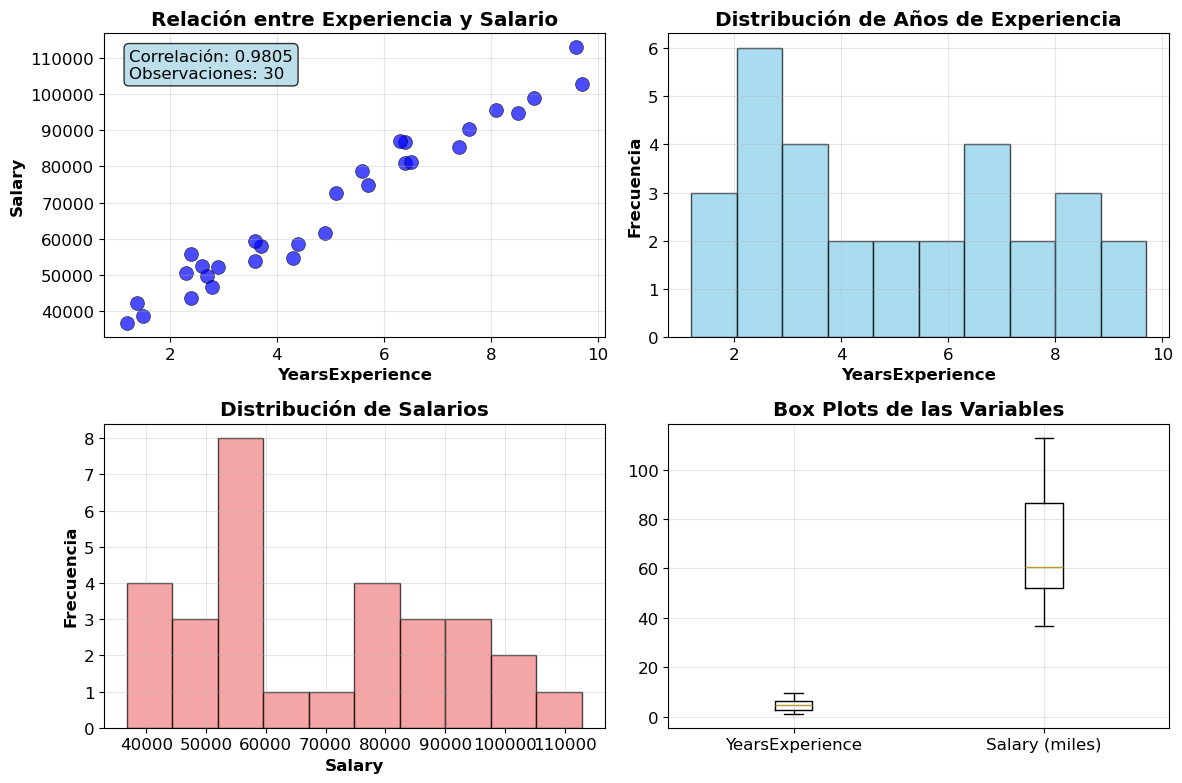


🔍 ANÁLISIS DE LA RELACIÓN LINEAL:
   • Coeficiente de correlación de Pearson: 0.9805
   • Interpretación: Correlación muy fuerte positiva

❓ ¿EXISTE UNA RELACIÓN LINEAL A SIMPLE VISTA?
   ✅ SÍ, existe una relación lineal clara entre las variables
   ✅ Los puntos siguen aproximadamente una línea recta
   ✅ La regresión lineal será apropiada para este conjunto de datos

📊 INTERPRETACIÓN DEL COMPORTAMIENTO GENERAL:
   • Rango de experiencia: 1.2 - 9.7 años
   • Rango de salarios: $36,712 - $112,886
   • Tendencia general: A mayor experiencia, mayor salario
   • El modelo de regresión lineal simple es apropiado para estos datos


('YearsExperience', 'Salary')

In [4]:
#  Análisis exploratorio (complemento a sección 2)
regresionLinealSalarios.analisis_exploratorio()

---
# 🔄 SECCIÓN 3: DIVISIÓN DEL CONJUNTO DE DATOS


🔄 SECCIÓN 3: DIVISIÓN DEL CONJUNTO DE DATOS

🎯 IDENTIFICACIÓN DE VARIABLES:
   • Variable independiente (X): YearsExperience
     - Descripción: Años de experiencia laboral
     - Rol: Variable predictora (entrada del modelo)
   • Variable dependiente (y): Salary
     - Descripción: Salario anual en dólares
     - Rol: Variable objetivo (lo que queremos predecir)

📊 PREPARACIÓN DE MATRICES:
   • Forma de X: (30, 1) (filas, características)
   • Forma de y: (30,) (filas,)
   • Nota: X se redimensiona a (-1, 1) para compatibilidad con scikit-learn

📚 ¿POR QUÉ DIVIDIR LOS DATOS?
   • PREVENIR SOBREAJUSTE (Overfitting):
     - El modelo podría memorizar los datos de entrenamiento
     - Sin datos nuevos, no sabríamos si generaliza bien
   • EVALUACIÓN OBJETIVA:
     - Los datos de prueba simulan datos 'nunca vistos'
     - Permite evaluar el rendimiento real del modelo
   • VALIDACIÓN DE GENERALIZACIÓN:
     - Confirma que el modelo funciona con datos nuevos
     - Detecta problemas de aj

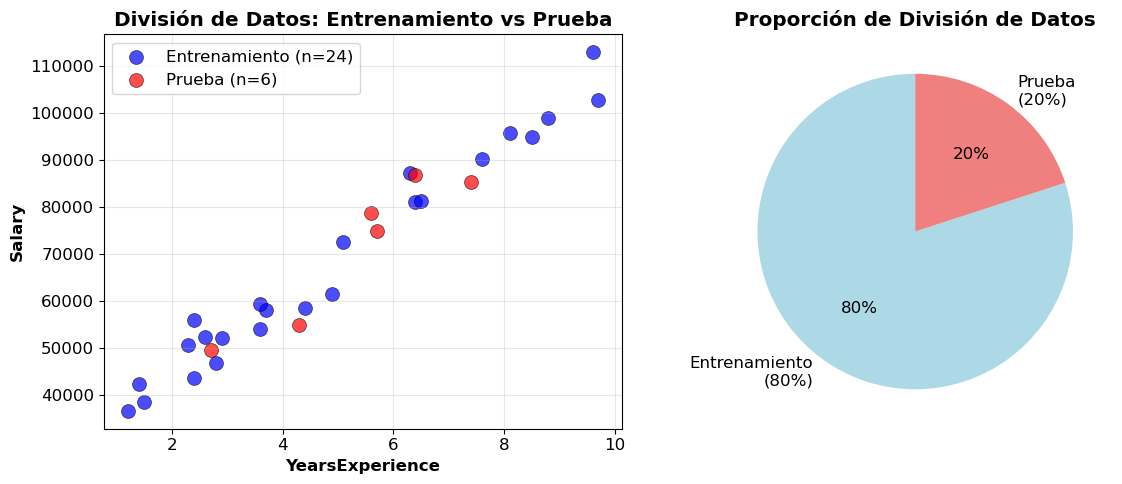


✅ SECCIÓN 3 COMPLETADA


True

In [5]:
regresionLinealSalarios.seccion_3_division_datos()

---
# 🤖 SECCIÓN 4: ENTRENAMIENTO DEL MODELO
---


🤖 SECCIÓN 4: ENTRENAMIENTO DEL MODELO

🔧 CREACIÓN DEL MODELO:
   • Tipo: Regresión Lineal Simple
   • Algoritmo: Mínimos Cuadrados Ordinarios (OLS)
   • Librería: scikit-learn (sklearn.linear_model.LinearRegression)
   ✅ Modelo creado exitosamente

🎯 ENTRENAMIENTO DEL MODELO:
   • Datos de entrenamiento: 24 muestras
   • Proceso: Encontrar los mejores valores de β₀ y β₁
   • Objetivo: Minimizar la suma de errores cuadráticos
   ✅ Modelo entrenado exitosamente

📊 PARÁMETROS DEL MODELO ENTRENADO:
   • Intersección (β₀): 28330.59
   • Coeficiente/Pendiente (β₁): 8153.20
   • Ecuación del modelo: y = 28330.59 + 8153.20 × X

🔍 INTERPRETACIÓN DE LOS PARÁMETROS:
   • INTERSECCIÓN (β₀ = 28330.59):
     - Representa el salario base teórico con 0 años de experiencia
     - Valor: $28,330.59
     - Interpretación: Salario inicial esperado

   • PENDIENTE (β₁ = 8153.20):
     - Por cada año adicional de experiencia,
       el salario aumenta en promedio $8,153.20
     - Relación POSITIVA: más exp

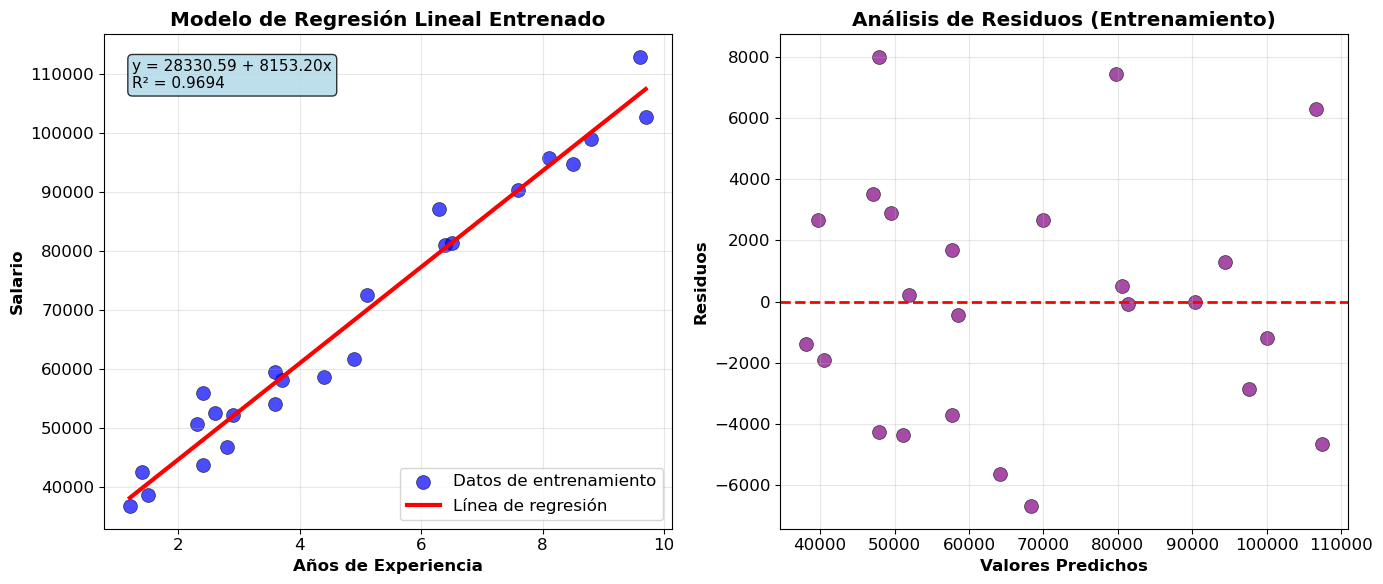


📊 MÉTRICAS DE RENDIMIENTO EN ENTRENAMIENTO:
   • R² (Coeficiente de determinación): 0.9694
   • MAE (Error Absoluto Medio): $3,098.28
   • MSE (Error Cuadrático Medio): $15,122,329.33
   • RMSE (Raíz del Error Cuadrático Medio): $3,888.74

🔍 INTERPRETACIÓN DEL R²:
   ✅ Excelente ajuste: El modelo explica 96.9% de la variabilidad

✅ SECCIÓN 4 COMPLETADA


True

In [6]:
regresionLinealSalarios.seccion_4_entrenamiento_modelo()

---
# ✅ SECCIÓN 5: VALIDACIÓN DEL MODELO 


🧪 SECCIÓN 5: VALIDACIÓN DEL MODELO

🔮 REALIZANDO PREDICCIONES EN CONJUNTO DE PRUEBA:
   • Conjunto de prueba: 6 muestras
   • Modelo entrenado con 24 muestras
   ✅ Predicciones completadas

📋 COMPARACIÓN: VALORES REALES vs PREDICHOS
#   Experiencia  Salario Real    Salario Pred    Error Abs    Error %   
1   2.7          $49,713         $50,344         $631         1.3      %
2   4.3          $54,860         $63,389         $8,529       15.5     %
3   5.6          $78,711         $73,988         $4,723       6.0      %
4   5.7          $75,000         $74,804         $196         0.3      %
5   6.4          $86,803         $80,511         $6,292       7.2      %
6   7.4          $85,250         $88,664         $3,414       4.0      %

📊 ESTADÍSTICAS DE ERRORES EN VALIDACIÓN:
   • Error absoluto promedio: $3,964.24
   • Error absoluto máximo: $8,529.34
   • Error absoluto mínimo: $196.19
   • Error porcentual promedio: 5.72%
   • Error porcentual máximo: 15.55%


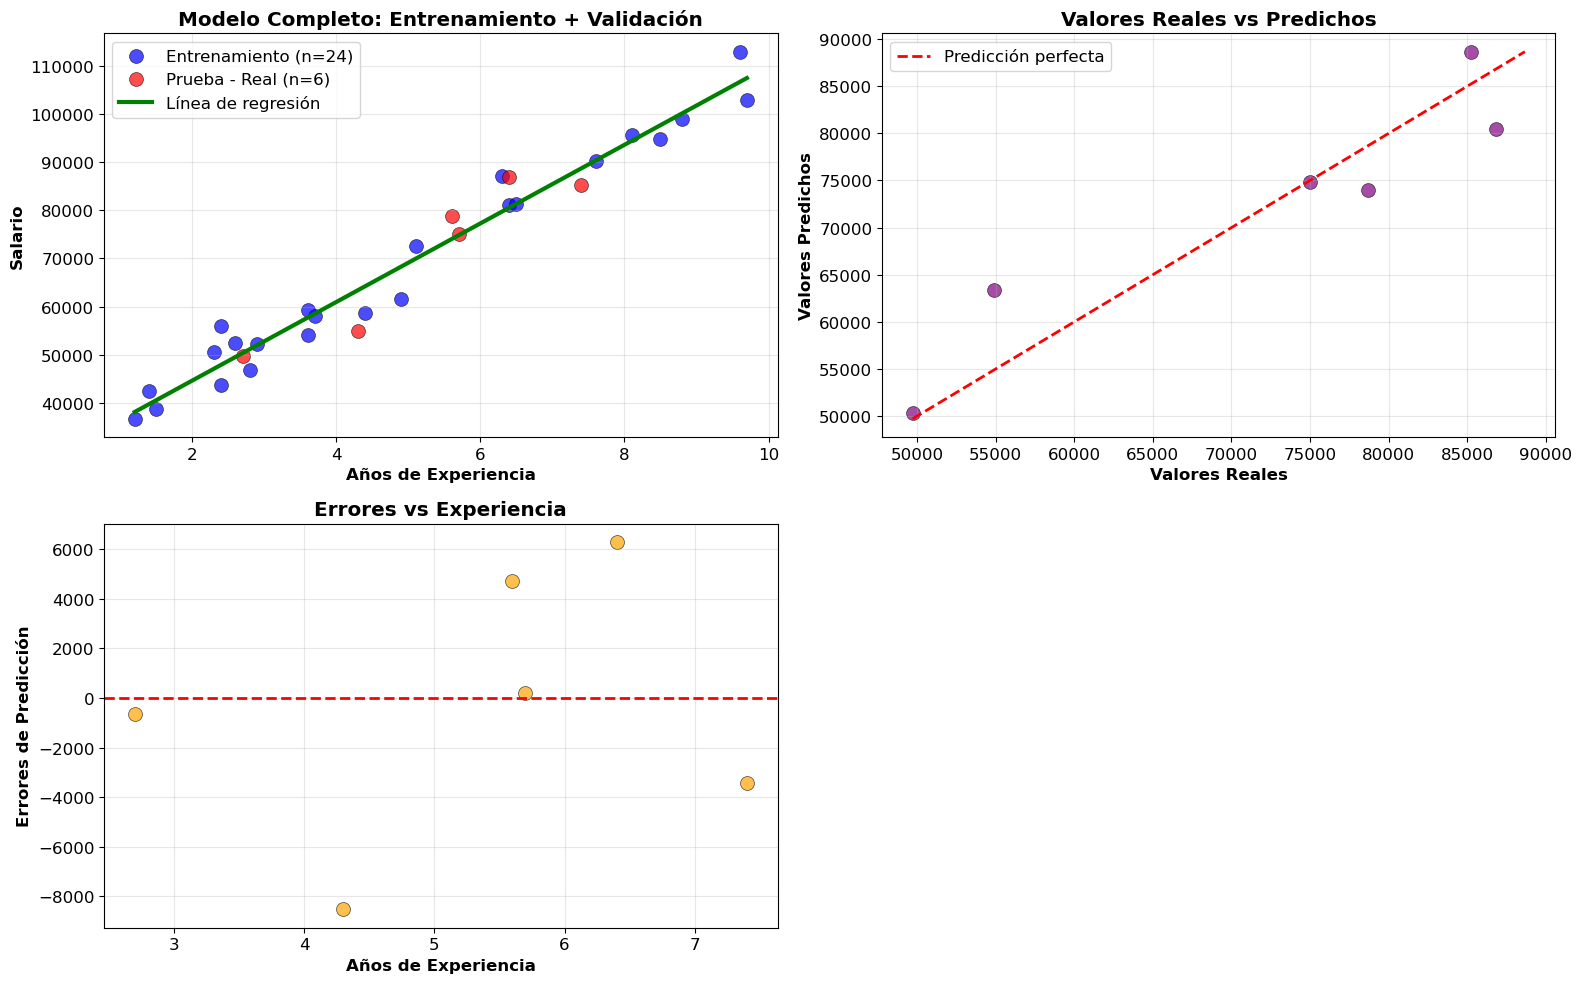


🔍 ANÁLISIS VISUAL DEL AJUSTE:
   • R² en conjunto de prueba: 0.8815
   ✅ EXCELENTE AJUSTE: El modelo explica 88.2% de la variabilidad
   ✅ Las predicciones siguen muy de cerca los valores reales

💡 INTERPRETACIÓN DE LA VALIDACIÓN:
   ✅ El modelo se ajusta ADECUADAMENTE a los datos
   ✅ La línea de regresión representa bien la relación entre variables
   ✅ El modelo es confiable para hacer predicciones

✅ SECCIÓN 5 COMPLETADA


True

In [7]:
regresionLinealSalarios.seccion_5_validacion_modelo()

---
# 📊 SECCIÓN 6: EVALUACIÓN DEL MODELO 
---


📊 SECCIÓN 6: EVALUACIÓN DEL MODELO

🧮 CÁLCULO DE MÉTRICAS DE EVALUACIÓN:

📏 MAE (Error Absoluto Medio):
   • Fórmula: MAE = (1/n) × Σ|y_real - y_pred|
   • Valor: $3,964.24
   • Interpretación: En promedio, las predicciones se desvían
     $3,964.24 del valor real del salario

📏 MSE (Error Cuadrático Medio):
   • Fórmula: MSE = (1/n) × Σ(y_real - y_pred)²
   • Valor: $24,455,715.80
   • Interpretación: Penaliza más los errores grandes
     debido al término cuadrático

📏 RMSE (Raíz del Error Cuadrático Medio):
   • Fórmula: RMSE = √MSE
   • Valor: $4,945.27
   • Interpretación: Error típico en las mismas unidades
     que la variable objetivo (dólares)

📏 R² (Coeficiente de Determinación):
   • Fórmula: R² = 1 - (SS_res / SS_tot)
   • Valor: 0.8815
   • Interpretación: El modelo explica 88.2% de la
     variabilidad en los salarios

🎯 EVALUACIÓN DE LAS MÉTRICAS:

📊 ANÁLISIS DEL MAE:
   • MAE: $3,964.24
   • Salario promedio: $71,722.83
   • MAE como % del salario promedio: 5.53%
   ✅ 

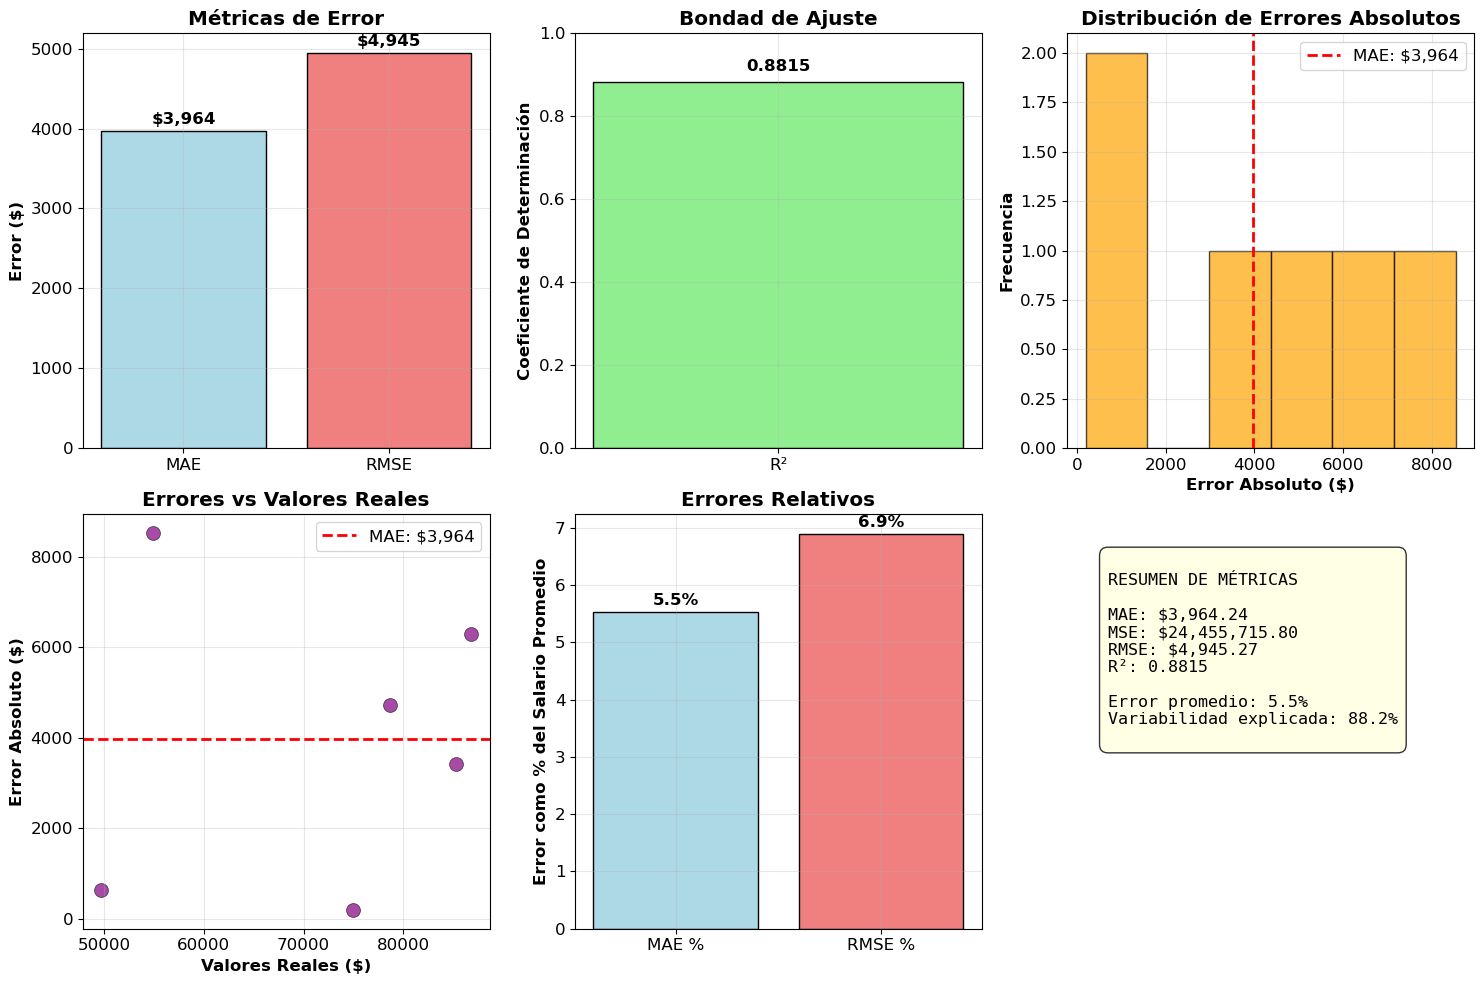


✅ SECCIÓN 6 COMPLETADA


(3964.241303777451, 24455715.79557587, 4945.272064869219, 0.8815472351552087)

In [8]:
regresionLinealSalarios.seccion_6_evaluacion_modelo()

---
# 🔮 SECCIÓN 7: PREDICCIÓN DE NUEVOS VALORES
---


🔮 SECCIÓN 7: PREDICCIÓN DE NUEVOS VALORES

🎯 OBJETIVO:
   • Usar el modelo entrenado para predecir salarios
   • Probar con valores de experiencia no vistos durante el entrenamiento
   • Interpretar los resultados en el contexto del problema

🧪 CASOS DE PRUEBA:
   • Se probarán 5 casos diferentes
   • Valores de experiencia: [7.5, 2.0, 12.0, 0.5, 15.0] años

Caso   Experiencia  Salario Pred    Interpretación                
1      7.5          $89,480         Interpolación (dentro rango)  
2      2.0          $44,637         Interpolación (dentro rango)  
3      12.0         $126,169        Extrapolación (mayor rango)   
4      0.5          $32,407         Extrapolación (menor rango)   
5      15.0         $150,629        Extrapolación (mayor rango)   

🔍 ANÁLISIS DETALLADO DEL CASO PRINCIPAL:
   • Experiencia: 7.5 años
   • Salario predicho: $89,479.57

🧮 VERIFICACIÓN MANUAL:
   • Ecuación: y = 28330.59 + 8153.20 × X
   • Sustitución: y = 28330.59 + 8153.20 × 7.5
   • Resultado: y = 

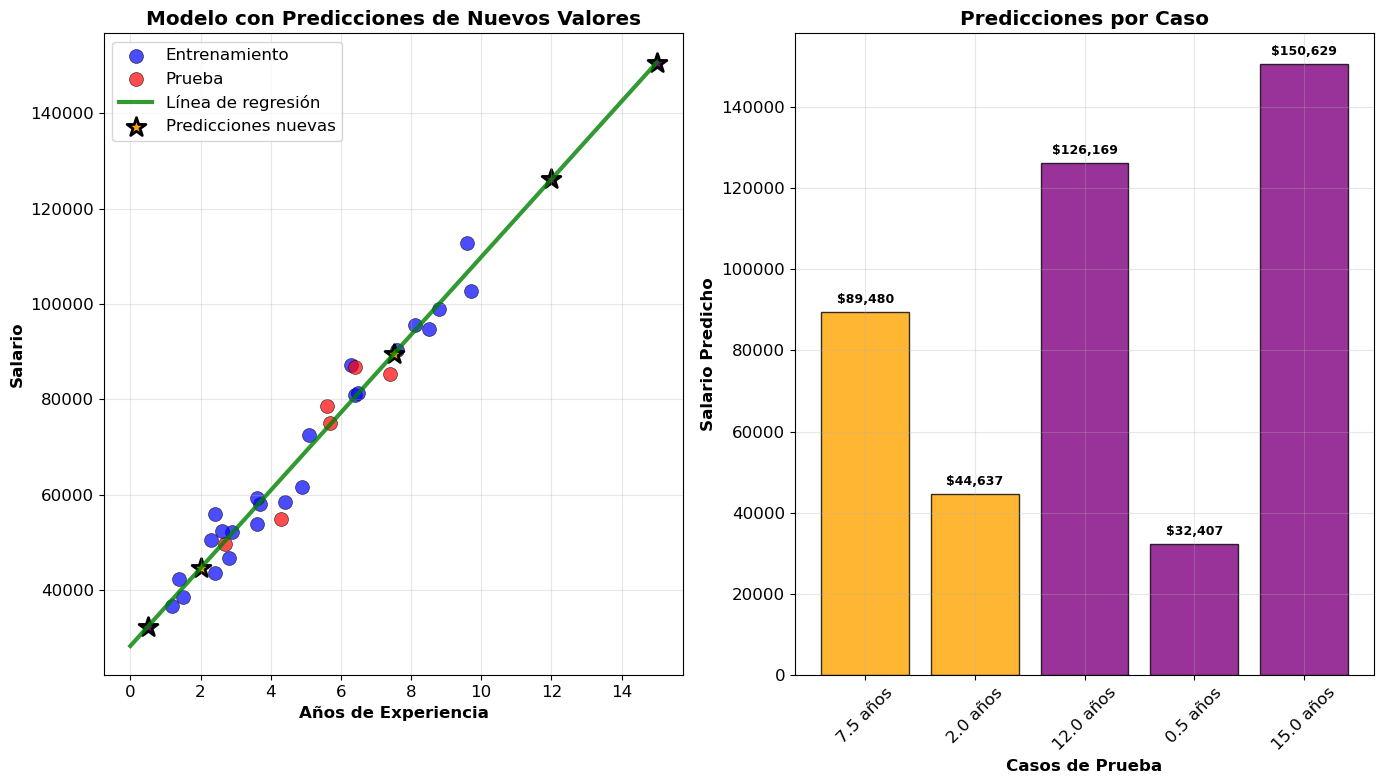


⚠️  CONSIDERACIONES IMPORTANTES:
   • INTERPOLACIÓN vs EXTRAPOLACIÓN:
     - Interpolación: Predicciones dentro del rango de entrenamiento
     - Extrapolación: Predicciones fuera del rango (menos confiables)
   • LIMITACIONES DEL MODELO:
     - Asume relación lineal constante
     - No considera otros factores (educación, ubicación, etc.)
     - Puede no ser válido para valores extremos

💼 APLICACIÓN PRÁCTICA:
   • El modelo es útil para:
     - Estimaciones iniciales de salarios
     - Análisis de tendencias salariales
     - Benchmarking en recursos humanos
   • Se recomienda:
     - Usar dentro del rango de experiencia conocido
     - Considerar otros factores en decisiones finales
     - Actualizar el modelo con nuevos datos

✅ SECCIÓN 7 COMPLETADA


[{'experiencia': 7.5,
  'salario_pred': 89479.57037495276,
  'tipo': 'Interpolación (dentro rango)'},
 {'experiencia': 2.0,
  'salario_pred': 44636.98341272725,
  'tipo': 'Interpolación (dentro rango)'},
 {'experiencia': 12.0,
  'salario_pred': 126168.95970768272,
  'tipo': 'Extrapolación (mayor rango)'},
 {'experiencia': 0.5,
  'salario_pred': 32407.186968483922,
  'tipo': 'Extrapolación (menor rango)'},
 {'experiencia': 15.0,
  'salario_pred': 150628.55259616938,
  'tipo': 'Extrapolación (mayor rango)'}]

In [9]:
regresionLinealSalarios.seccion_7_prediccion_nuevos_valores()

---
# 📝 SECCIÓN 8: ANÁLISIS Y CONCLUSIONES 
---


📝 SECCIÓN 8: ANÁLISIS Y CONCLUSIONES

📊 RESUMEN EJECUTIVO DEL MODELO:
   • Tipo de modelo: Regresión Lineal Simple
   • Variable independiente: Años de experiencia
   • Variable dependiente: Salario anual
   • Tamaño del dataset: 30 observaciones
   • División: 24 entrenamiento, 6 prueba

🔍 ANÁLISIS DE LOS PARÁMETROS DEL MODELO:
   • Ecuación: Salario = 28330.59 + 8153.20 × Experiencia
   • Interpretación económica:
     - Cada año adicional de experiencia incrementa el salario en $8,153.20
     - El salario base teórico (0 años) sería $28,330.59
     - La relación es positiva y lineal

📈 ANÁLISIS DEL RENDIMIENTO:
   • R² = 0.8815: El modelo explica 88.2% de la variabilidad
   • MAE = $3,964.24: Error promedio de predicción
   • RMSE = $4,945.27: Error típico considerando outliers

🎯 EVALUACIÓN DE LA CALIDAD DEL MODELO:
   ✅ Calidad del ajuste: EXCELENTE

💪 FORTALEZAS DEL MODELO:
   1. Alto poder explicativo (R² ≥ 0.7)
   2. Errores relativamente bajos (MAE ≤ 20% del promedio)
   3. S

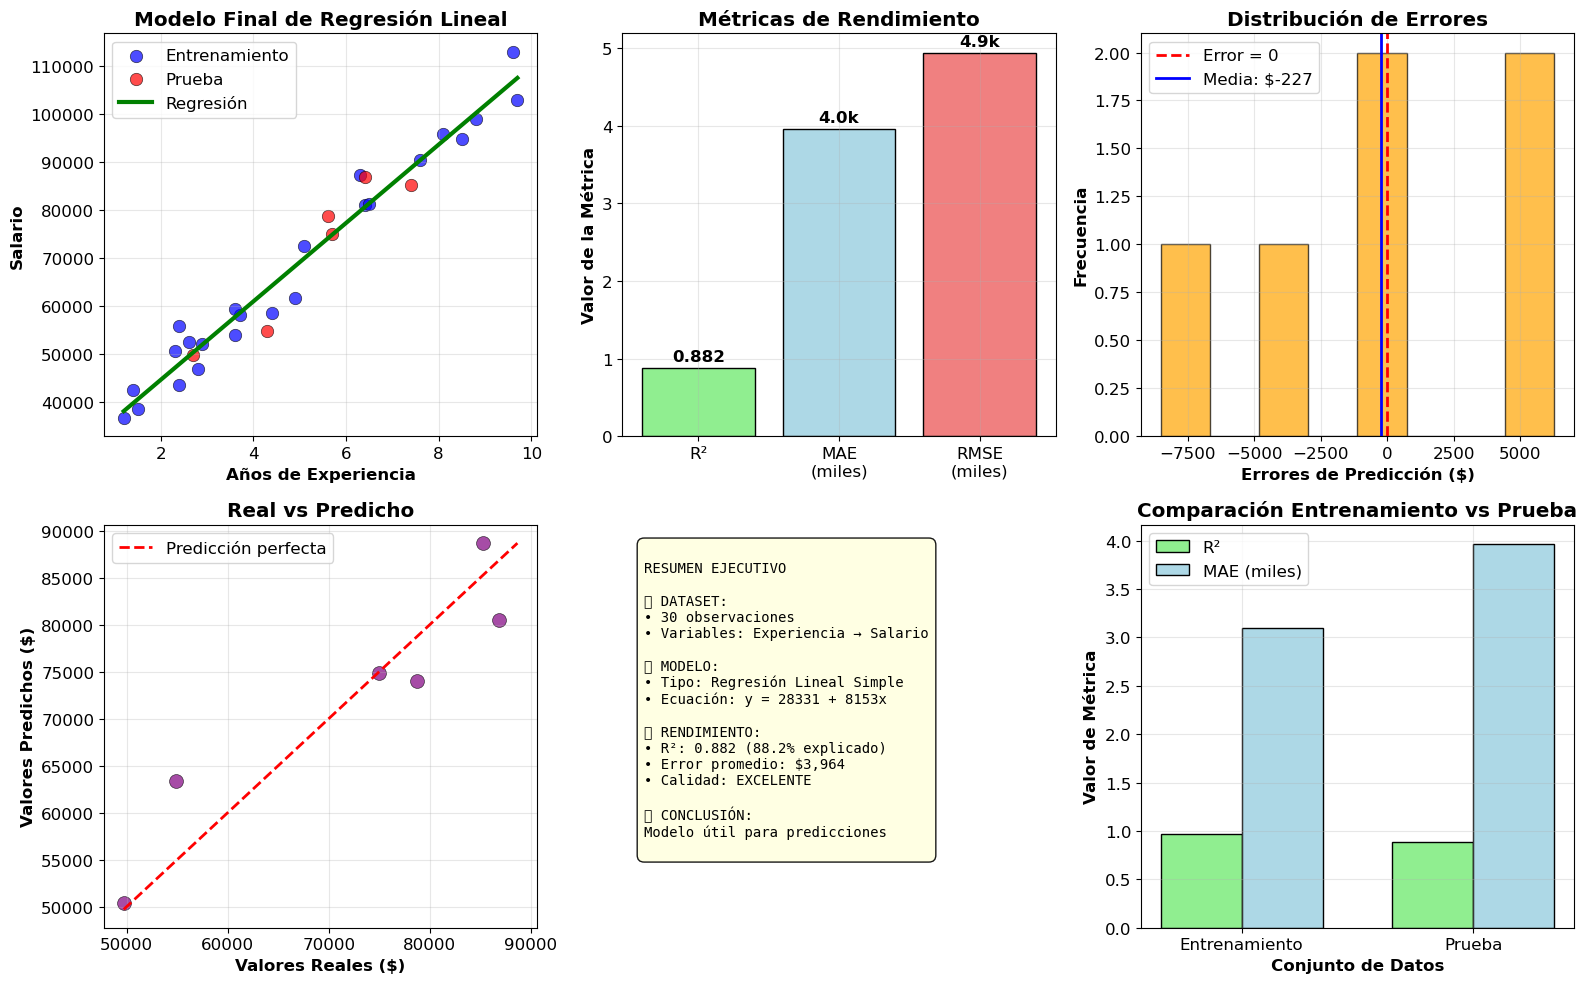


🎉 ANÁLISIS COMPLETO DE REGRESIÓN LINEAL FINALIZADO
✅ Todas las secciones completadas exitosamente
✅ Modelo entrenado y validado
✅ Predicciones realizadas
✅ Análisis y conclusiones presentadas

✅ SECCIÓN 8 COMPLETADA


True

In [10]:
regresionLinealSalarios.seccion_8_analisis_conclusiones()